# Data Project 1: Exploratory Data Analysis (EDA) & Data Cleaning


Project: ML-Ready Dataset Preparation for Environmental Impacts Prediction
CMPT 2400 - Data Preparations and Analytics

# Team Members:
- Alma Soria
- Angela Lekivetz
- Crystal Blackburn
- Michaela Goud



# Introduction

This notebook marks the first phase of our **ML-Ready Dataset Preparation for Environmental Impacts Prediction** project for **CMPT 2400 – Data Preparations and Analytics**. In this phase, we focus on **Exploratory Data Analysis (EDA) and data cleaning** using the **National Pollutant Release Inventory (NPRI)** dataset.

The NPRI, established under the authority of [Sections 46 to 53 of CEPA, 1999](https://www.canada.ca/en/services/environment/pollution-waste-management/national-pollutant-release-inventory.html), is a key resource for tracking pollutants released into the air, water, and land by industrial and commercial facilities across Canada. Transparency and public awareness are fundamental to the NPRI, reflecting the principle that the public has the right to know about pollutants affecting their environment.

# Project Context

## Chosen Problem
**Problem #5:**  
*“Based on NPRI data, which industry is predicted to have the highest growth of releases in 5 years? Which will have the largest decline?”*

## Overview
In this phase, we focus on **Data Project 1: Exploratory Data Analysis (EDA) & Data Cleaning** using the **National Pollutant Release Inventory (NPRI)** dataset. Our primary objective is to gain a deep understanding of the dataset and ensure its quality through thorough exploration and cleaning. This foundational work is essential to inform later predictive analyses related to the chosen problem.

- **Objective:** Prepare the NPRI dataset for future machine learning tasks aimed at predicting environmental impacts.  

# Scope of Work for Data Project 1
## Steps of EDA & Data Cleaning

### 1. Understanding

### 2. Fixing Bad Housekeeping

### 3. Issue Detection

### 4. Handling Missing Values

### 5. Handling Outliers

### 6. Pattern Discovery, Visualizations and Statistics


This phase is designed to build a solid, error-free dataset that will later be used to forecast industry trends in pollutant releases, specifically addressing which industries may experience the highest growth or largest decline in the next 5 years.

## Why EDA & Data Cleaning?

Conducting a thorough EDA and cleaning process is critical for laying a solid foundation for subsequent modeling phases. By resolving inconsistencies and understanding the nuances of the dataset, we minimize the risk of misleading analyses and improve the robustness of future predictions.

In the sections that follow, we will detail each step of our process, illustrate findings with visualizations, and document every decision made. This approach ensures transparency, reproducibility, and clarity for anyone seeking to understand or build upon our work.







# 1. Understanding - Crystal Blackburn
# **Author : Crystal Blackburn**

## Import Libraries & Create Dataframe

Reading data directly from a saved CSV file through Google Drive is much faster than loading it from Excel.

[The link for our dataset](https://docs.google.com/spreadsheets/d/11FQhtjlqF7o9ExI97Y_sbdlJqRWx-aOf/edit?usp=sharing&ouid=106766232991882931966&rtpof=true&sd=true) is in this hyperlink.

By using the code below, we can significantly reduce the waiting time and streamline our data processing workflow, instead of reading directly from the excel file. We separated first our table of interest which is "Releases 2000-2020"


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import gdown #To download files, in this case from google drive

# Set pandas display options for better visibility, global
# Ensures that when you print a DataFrame, all columns are shown (even if there are many).
pd.set_option('display.max_columns', None)
# Prevents pandas from breaking the DataFrame output across multiple lines.
pd.set_option('display.expand_frame_repr', False)

# Google Drive file ID (Extracted from google drive sharable link)
file_id_releases = "17OQ5UFWdHrVxw37F94jqvK-DjBqLzAJI"
file_name_releases = "df_releases.csv"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id_releases}", file_name_releases, quiet=False)

# Read the CSV file
df = pd.read_csv(file_name_releases)

Downloading...
From (original): https://drive.google.com/uc?id=17OQ5UFWdHrVxw37F94jqvK-DjBqLzAJI
From (redirected): https://drive.google.com/uc?id=17OQ5UFWdHrVxw37F94jqvK-DjBqLzAJI&confirm=t&uuid=db7d2038-48b9-4a50-bcca-e87811a18ea8
To: /content/df_releases.csv
100%|██████████| 169M/169M [00:02<00:00, 66.4MB/s]
<ipython-input-46-67605d6aee4e>:23: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name_releases)


## Dataset Inspection


## Dataset Structure

The NPRI dataset consists of three primary sheets:

### Releases 2000-2020
- **Records:** 737,516
- **Columns:** 28
- **Details:** Contains data on pollutant releases to air, land, and water
- **Time Span:** Covers 23 years (2000-2022)

### Disposals and Transfers 00-20
- **Records:** 191,645
- **Columns:** 41
- **Details:** Documents pollutant disposals and transfers for recycling or treatment

### Comments
- **Records:** 363,310
- **Columns:** 14
- **Details:** Contains contextual information about facilities and substances

## Focus on Pollutant Releases

Since the primary factor of our prediction model is pollutant releases over time, our main focus will be on the **Releases 2000-2020** sheet.

#### Primary Table: "Releases 2000-2020"
- **Time Series Data:** Covers pollutant releases from 2000 to 2022.
- **Industry Breakdown:** Categorized by industry using NAICS codes.
- **Release Types:** Includes all types of releases—air, water, and land—which are essential for forecasting future trends.

#### Secondary Table: "Comments"
  Provides contextual information about specific industries or facilities, though it's not crucial for the core analysis.

#### Not relevant: "Disposals and Transfers 00-20:"

  Focuses on pollutant disposals and transfers post-generation, making it less relevant to our prediction model that centers on pollutant releases.

## .head(), .columns

We will start with analyzing the basic structure of the dataset.

In [ ]:
# Display first few rows
df.head()


Reporting_Year / Année  NPRI_ID / No_INRP Number of employees Company_Name / Dénomination_sociale_de_l'entreprise Facility_Name / Installation  NAICS / Code_SCIAN NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude   Longitude CAS_Number / No_CAS Substance Name (English) / Nom de substance (Anglais) Units / Unités Estimation_Method / Méthode_d’estimation  Release to Air - Fugitive  Release to Air - Other Non-Point   Release to Air - Road dust    Release to Air - Spills   Release to Air - Stack / Point    Release to Air - Storage / Handling   Releases to Land - Leaks  Releases to Land - Other   Releases to Land - Spills   Releases to Water Bodies - Direct Discharges   Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills   Sum of release to all media (<1tonne)
0                    2000                  1                 440             Alberta-Pacific Forest Industries Inc.                       (blank)              322112            Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867          10049-04-4                                   Chlorine dioxide            tonnes     M - Monitoring or Direct Measurement                        NaN                                NaN                           NaN                       NaN                             5.200                                   NaN                       NaN                        NaN                         NaN                                            NaN                               NaN                                 NaN                                    NaN
1                    2000                  1                 440             Alberta-Pacific Forest Industries Inc.                       (blank)              322112            Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867             67-56-1                                           Methanol            tonnes                      E - Emission Factor                        NaN                                NaN                           NaN                       NaN                           113.000                                   NaN                       NaN                        NaN                         NaN                                            NaN                               NaN                                 NaN                                    NaN
2                    2000                  1                 440             Alberta-Pacific Forest Industries Inc.                       (blank)              322112            Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867             67-66-3                                         Chloroform            tonnes     M - Monitoring or Direct Measurement                        NaN                                NaN                           NaN                       NaN                               NaN                                   NaN                       NaN                        NaN                         NaN                                            0.0                               NaN                                 NaN                                    NaN
3                    2000                  1                 440             Alberta-Pacific Forest Industries Inc.                       (blank)              322112            Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867             75-07-0                                       Acetaldehyde            tonnes                      E - Emission Factor                        NaN                                NaN                           NaN                       NaN                             7.670                                   NaN                       NaN                        NaN                         NaN                                            NaN                               NaN                                 NaN        

In [ ]:
#Visualize our columns
df.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_d’estimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

##  Initial shape

In [ ]:
# Display shape (rows, columns)
df.shape


(737516, 28)

## Function to extract and display basic info about the dataset.

We will create a table summary to display column names, data types, and counts for missing and unique values.

In [ ]:
def dataframe_summary(dataframe):
    print('Dataset Releases Table Summary')
    print('-' * 106)

    # Shape
    print(f'Number of rows: {dataframe.shape[0]}')
    print(f'Number of columns: {dataframe.shape[1]}')

    print('\nColumn Overview')
    print('-' * 106)

    # Data types, missing value counts, and unique values
    summary = pd.DataFrame({
        'Data Type': dataframe.dtypes,
        'Missing Values': dataframe.isnull().sum(),
        'Missing Values (%)': round(dataframe.isnull().sum() / len(dataframe) * 100, 2),
        'Unique Values': dataframe.nunique()
    })

    print(summary)
    print('-' * 106)

# Call function for our dataframe (assuming it's now named df)
dataframe_summary(df)


Dataset Releases Table Summary
----------------------------------------------------------------------------------------------------------
Number of rows: 737516
Number of columns: 28

Column Overview
----------------------------------------------------------------------------------------------------------
                                                   Data Type  Missing Values  Missing Values (%)  Unique Values
Reporting_Year / Année                                 int64               0                0.00             23
NPRI_ID / No_INRP                                      int64               0                0.00          21868
Number of employees                                   object             616                0.08           2610
Company_Name / Dénomination_sociale_de_l'entrep...    object               0                0.00           9859
Facility_Name / Installation                          object            1176                0.16          32102
NAICS / Code_SCIAN   

## Column Descriptions for Releases Table

- **Reporting_Year:** The year in which the facility or company submitted its environmental data to the NPRI. This allows for tracking trends and changes in releases over time.
- **NPRI_ID:** A unique numerical identifier assigned to each reporting facility or company. This ID can be used to link to additional information about the facility, such as its location details, contact information, and historical reporting data.
- **Number of employees:** The total number of employees working at the reporting facility. This can be used to normalize release data by facility size, allowing for comparisons between facilities of different scales.
- **Company_Name:** The official name of the company responsible for the reported environmental data. This helps identify major polluters and track their performance over time.
- **Facility_Name:** The name of the specific facility where the pollutant releases occurred. This provides geographic context and allows for identifying pollution hotspots.
- **NAICS:** The North American Industry Classification System (NAICS) code assigned to the facility. NAICS is a hierarchical classification system (e.g., 2-digit sectors, 3-digit subsectors) that categorizes businesses based on their primary economic activity. This information is crucial for understanding which industries contribute most to pollution and for analyzing sector-specific trends.
- **NAICS Title:** The descriptive title corresponding to the NAICS code, providing a human-readable description of the industry sector.
- **City:** The city or municipality where the reporting facility is located. This allows for geographic analysis of pollution patterns and identification of urban areas with high emissions.
- **Latitude:** The latitude coordinate of the facility's location. This enables mapping and spatial analysis of pollution data.
- **Longitude:** The longitude coordinate of the facility's location. This, along with latitude, provides precise geographic coordinates.
- **CAS_Number:** The Chemical Abstracts Service (CAS) registry number for the substance being released. CAS numbers are unique identifiers assigned to chemical substances, allowing for standardized identification and tracking of specific pollutants across different datasets and studies.
- **Substance Name:** The common name or chemical name of the substance being released. This provides a human-readable identifier for the pollutant.
- **Units:** The units of measurement used to quantify the amount of substance released (e.g., tonnes, kilograms, grams). Standardizing these units is essential for accurate comparisons and analysis.
- **Estimation_Method:** The method used by the facility to estimate the quantity of the release or disposal of the substance. This might include direct monitoring, emission factors, mass balance calculations, or other estimation techniques. Understanding the estimation method provides insights into the accuracy and reliability of the reported data.
- **Release to Air - Fugitive:** The estimated amount of the substance released into the air from fugitive sources. These are typically uncontrolled or unintended releases, such as leaks from equipment, vents, or open storage.
- **Release to Air - Other Non-Point:** Releases to the air from other non-point sources, which are diffuse sources that cannot be easily attributed to a single point. This might include emissions from surface areas, evaporation from open containers, or windblown dust.
- **Release to Air - Road Dust:** The amount of the substance released into the air specifically due to road dust generated by vehicles or other activities on unpaved roads.
- **Release to Air - Spills:** The amount of the substance released into the air as a result of accidental spills or leaks, typically involving a sudden and uncontrolled release of a significant quantity.
- **Release to Air - Stack / Point:** The amount of the substance released into the air from stack or point sources. These are typically controlled releases from industrial processes, such as emissions from smokestacks, chimneys, or exhaust vents.
- **Release to Air - Storage / Handling:** The amount of the substance released into the air during the storage or handling of materials. This might include emissions from loading/unloading operations, material transfer, or storage tanks.
- **Releases to Land - Leaks:** The amount of the substance released onto land due to leaks from facilities, equipment, or storage containers. This can result in soil and groundwater contamination.
- **Releases to Land - Other:** Releases to land that do not fall under specific categories like leaks or spills. This might include land disposal of waste materials, application of pesticides, or releases from land treatment processes.
- **Releases to Land - Spills:** The amount of the substance released onto land from spills, similar to air spills but with the impact focused on soil and groundwater contamination.
- **Releases to Water Bodies - Direct Discharges:** The amount of the substance directly discharged into water bodies, such as rivers, lakes, or streams. This can include wastewater discharges from industrial processes or municipal treatment plants.
- **Releases to Water Bodies - Leaks:** The amount of the substance released into water bodies due to leaks from facilities, equipment, or pipelines.
- **Releases to Water Bodies - Spills:** The amount of the substance released into water bodies as a result of spills or accidental discharges.
- **Sum of release to all media (<1tonne):** A summary of all releases to air, land, and water, specifically for cases where the total release quantity is less than 1 tonne. This provides a simplified reporting category for minor releases.


## Understanding Summary

The NPRI dataset contains information about pollutant releases, disposals, and transfers in Canada between the years 2000-2020.

This project focuses on analyzing the "Releases 2000-2020" sheet to predict future pollutant release trends.

Key features include: Reporting_Year, NPRI_ID, Company_Name, Facility_Name, NAICS, CAS_Number, Substance_Name, and various release columns.

The goal is to develop predictive models to forecast industry-specific pollutant release trends over the next five years, aiding environmental policy and pollution reduction efforts.

# 2. Fixing Bad Housekeeping

Fixing bad housekeeping issues such as standardizing column names, categorical values, and data types ensures consistency within our data and makes it easier to work with by preventing errors in our further analysis.


## Convert Column Names to a Consistent Format

Removing French labels and blank spaces within our column names for consistency.

In [ ]:
# Rename all columns with French headings for RELEASES table
df = df.rename(columns={
    'Reporting_Year / Année' : 'Reporting_Year',
    'NPRI_ID / No_INRP' : 'NPRI_ID',
    'Company_Name / Dénomination_sociale_de_l\'entreprise' : 'Company_Name',
    'Facility_Name / Installation' : 'Facility_Name',
    'NAICS / Code_SCIAN' : 'NAICS',
    'NAICS Title / Titre Code_SCIAN' : 'NAICS_Title',
    'CAS_Number / No_CAS' : 'CAS_Number',
    'Substance Name (English) / Nom de substance (Anglais)' : 'Substance_Name',
    'PROVINCE' : 'Province',
    'Units / Unités' : 'Units',
    'Estimation_Method / Méthode_d’estimation' : 'Estimation_Method',
    'Value / Valeur' : 'Value',
    'Release to Air - Other Non-Point ' : 'Release to Air - Other Non-Point',
    'Release to Air - Road dust  ' : 'Release to Air - Road dust',
    'Release to Air - Spills ' : 'Release to Air - Spills',
    'Release to Air - Stack / Point  ' : 'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling ' : 'Release to Air - Storage / Handling',
    'Releases to Land - Other ' : 'Releases to Land - Other',
    'Releases to Land - Spills ' : 'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges ' : 'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Spills ' : 'Releases to Water Bodies - Spills'

})

df.head()

Reporting_Year  NPRI_ID Number of employees                            Company_Name Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units                     Estimation_Method  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)
0            2000        1                 440  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867  10049-04-4   Chlorine dioxide  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
1            2000        1                 440  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-56-1           Methanol  tonnes                   E - Emission Factor                        NaN                               NaN                         NaN                      NaN                         113.000                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
2            2000        1                 440  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-66-3         Chloroform  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           0.0                               NaN                                NaN                                    NaN
3            2000        1                 440  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     75-07-0       Acetaldehyde  tonnes                   E - Emission Factor                        NaN                               NaN                         NaN                      NaN                           7.670                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
4            2000        1                 440  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   7647-01-0  Hydrochloric acid  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                           0.665                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                      

## Handling Data Types

Textual Data

* Company_Name (object)
* Facility_Name (object)
* NAICS (int64)
* NAICS_Title (object)
* Substance_Name (object)
* CAS_Number (object)
* Province (object)
* City (object)
* Units (object)
* Estimation_Method (object)

Converting these columns to dtype category is best for memory optimization.


In [ ]:
for col in ['Company_Name', 'Facility_Name', 'NAICS', 'NAICS_Title',
            'Substance_Name', 'CAS_Number', 'Province', 'City',
            'Units', 'Estimation_Method']:
    df[col] = df[col].astype('category')


Numeric Data

* Reporting_Year (int64): Keep as int64, appropriate for year values
* NPRI_ID (int64): Keep as int64
* Number of employees (object): Currently wrong data type - should be converted to int or float after cleaning any non-numeric characters
* Latitude (float64) & Longitude (float64): Keep as float64, appropriate for coordinate values

* All release columns can be kept as float64


In [ ]:
df['Number of employees'] = pd.to_numeric(df['Number of employees'], errors='coerce')

In [ ]:
# Verify all datatypes are correct to continue with analysis
df.dtypes

Reporting_Year                                     int64
NPRI_ID                                            int64
Number of employees                              float64
Company_Name                                    category
Facility_Name                                   category
NAICS                                           category
NAICS_Title                                     category
Province                                        category
City                                            category
Latitude                                         float64
Longitude                                        float64
CAS_Number                                      category
Substance_Name                                  category
Units                                           category
Estimation_Method                               category
Release to Air - Fugitive                        float64
Release to Air - Other Non-Point                 float64
Release to Air - Road dust                       float64
Release to Air - Spills                          float64
Release to Air - Stack / Point                   float64
Release to Air - Storage / Handling              float64
Releases to Land - Leaks                         float64
Releases to Land - Other                         float64
Releases to Land - Spills                        float64
Releases to Water Bodies - Direct Discharges     float64
Releases to Water Bodies - Leaks                 float64
Releases to Water Bodies - Spills                float64
Sum of release to all media (<1tonne)            float64
dtype: object

# 3. Issue Detection

# **Author(s) : Crystal Blackburn and collaboration for issue detection from Alma Soria

We will also check for any issues such as duplicate records, identify missing values and assess their impact, verify the validity of numerical values, detect inconsistencies in categorical values, and ensure units of measurement are consistent.

Identifying and resolving any data quality issues is crucial to ensure the integrity of our analysis and prevent any misleading conclusions.

## Duplicate Records

No duplicate records were detected in the dataset.  

In [ ]:
print(f'Number of duplicate records: {df.duplicated().sum()}')

Number of duplicate records: 0


## Identifying Inconsistent Text & Typos

We have found some errors within our categorical values simply by looking at the Excel files, we will tackle them before handling missing values.

Some examples of this are given in the screenshots below.

### Explanation of Standardizing Text Columns

### 1. Accents Removal
- The `remove_accents` function uses Unicode normalization to decompose accented characters.
- It then encodes the result to ASCII (ignoring the accents) and decodes back to a regular string.
- This process ensures that accented letters (e.g., “é”) become their non-accented equivalents (e.g., “e”).

### 2. Replacing Punctuation
- Rather than removing punctuation entirely, we replace them with a space:
  ```python
  .str.replace(r'[^\w\s]|_', ' ', regex=True)


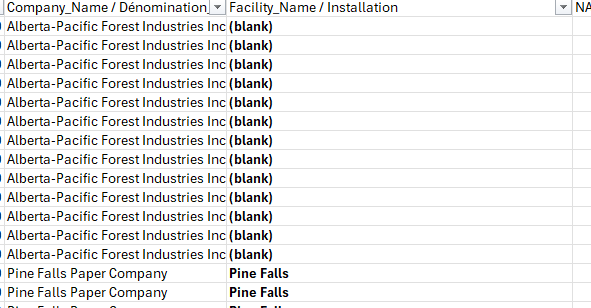

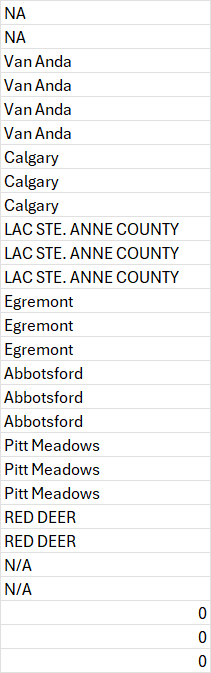

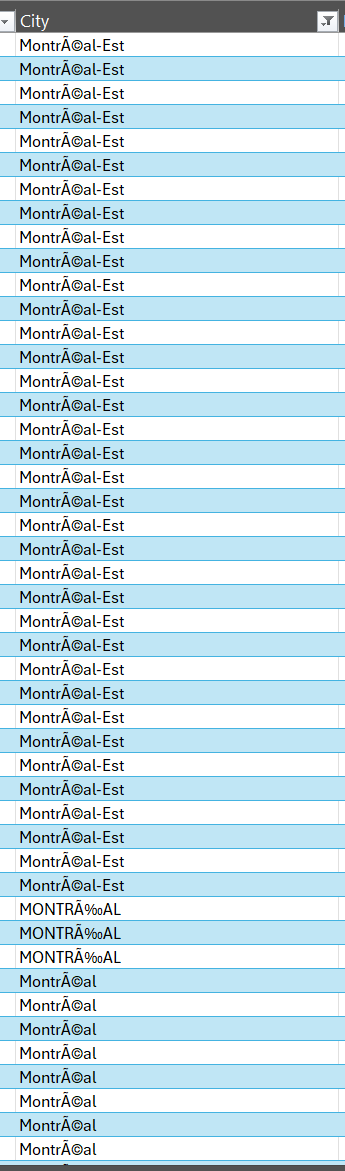

### Cleaning Text in Column CAS Number


**Whitespace & Substring Removal:**

We first remove any extra spaces and unwanted substrings (like "0:00") so that only the core CAS number remains.

**Standardizing NA Values:**

The regex converts entries like "NA - 09" into "NA-09", ensuring consistency.

**Validation:**

The regex pattern ^\d{2,7}-\d{2}-\d$ checks if the number conforms to a typical CAS number format. We can then decide how to handle non-matches (e.g., flag them, set them to None, etc.).

In [ ]:
import re

def clean_cas_number(cas):
    # Ensure the value is a string and strip whitespace
    cas = str(cas).strip()

    # Remove a trailing "0:00" if present (e.g., "7783-06-04 0:00" becomes "7783-06-04")
    cas = re.sub(r'\s0:00$', '', cas)

    # Standardize NA entries like "NA - 09" to "NA-09"
    cas = re.sub(r'^NA\s*-\s*(\d+)$', r'NA-\1', cas)

    # Define a regex pattern for valid CAS numbers
    pattern = re.compile(r'^\d{2,7}-\d{2}-\d$')

    # Optionally, flag or process non-matching CAS numbers
    if pattern.match(cas):
        return cas
    else:
        # Here you can decide how to handle invalid formats:
        # return None, a placeholder, or even the original value for manual review.
        return cas  # For now, we return the cleaned value even if it doesn't match.

# Apply the cleaning function to the CAS_Number column
df['CAS_Number'] = df['CAS_Number'].apply(clean_cas_number)


In [ ]:
df.head()

Reporting_Year  NPRI_ID  Number of employees                            Company_Name Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units                     Estimation_Method  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)
0            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867  10049-04-4   Chlorine dioxide  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
1            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-56-1           Methanol  tonnes                   E - Emission Factor                        NaN                               NaN                         NaN                      NaN                         113.000                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
2            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-66-3         Chloroform  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           0.0                               NaN                                NaN                                    NaN
3            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     75-07-0       Acetaldehyde  tonnes                   E - Emission Factor                        NaN                               NaN                         NaN                      NaN                           7.670                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN
4            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   7647-01-0  Hydrochloric acid  tonnes  M - Monitoring or Direct Measurement                        NaN                               NaN                         NaN                      NaN                           0.665                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                

### Cleaning Text Substance_Name

We first print each substance in the column to see how the data is formatted, allowing us to find ways to clean and standardize the text in this column.

In [ ]:
unique_substances = df['Substance_Name'].unique()

# Sort them alphabetically
unique_substances_sorted = sorted(unique_substances)

# Print each unique substance on its own line
for substance in unique_substances_sorted:
    print(substance)



1,1,1,2-Tetrachloroethane
1,1,2,2-Tetrachloroethane
1,1,2-Trichloroethane
1,1-Methylenebis(4-isocyanatocyclohexane)
1,2,4-Trichlorobenzene
1,2,4-Trimethylbenzene
1,2-Butylene oxide
1,2-Dichloroethane
1,2-Dichloropropane
1,3-Butadiene
1,4-Benzenediamine, N,N'-mixed phenyl and tolyl derivatives
1,4-Dioxane
1-Nitropyrene
2,2,4-Trimethylhexamethylene diisocyanate
2,4-Dichlorophenol (and its salts)
2,4-Dinitrotoluene
2,6-Di-t-butyl-4-methylphenol
2-(2-Methoxyethoxy)ethanol
2-Butoxyethanol
2-Ethoxyethanol
2-Ethoxyethyl acetate
2-Mercaptobenzothiazole
2-Methoxyethanol
2-Propanone, reaction products with diphenylamine
3,3'-Dichlorobenzidine dihydrochloride
3-Methylcholanthrene
4-tert-Octylphenol
5-Methylchrysene
7,12-Dimethylbenz[a]anthracene
7H-Dibenzo[c,g]carbazole
Acenaphthene
Acenaphthylene
Acetaldehyde
Acetonitrile
Acetophenone
Acrolein
Acrylamide
Acrylic acid (and its salts)
Acrylonitrile
Alkanes, C10-13, chloro
Allyl alcohol
Aluminum (fume or dust only)
Aluminum oxide (fibrous forms onl

In [ ]:
import re
import unicodedata

def remove_accents(text):
    if isinstance(text, str):
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

def clean_substance_name(name):
    # Convert to string, strip whitespace, and remove accents
    name = str(name).strip()
    name = remove_accents(name)
    # Lowercase for standardization
    name = name.lower()
    # Remove parenthetical content (e.g., "(and its salts)") if you do not need that detail
    name = re.sub(r'\(.*?\)', '', name)
    # Remove unwanted punctuation while preserving commas, hyphens, and square brackets
    # This regex removes any character that is not a word character, whitespace, comma, hyphen, or square bracket.
    name = re.sub(r"[^\w\s,\-\[\]]", " ", name)
    # Collapse multiple spaces and trim again
    name = re.sub(r'\s+', ' ', name).strip()
    return name

# Apply cleaning to the Substance_Name column
df['Substance_Name'] = df['Substance_Name'].apply(clean_substance_name).astype('category')

# Optionally, print sorted unique values for inspection
unique_substances = sorted(df['Substance_Name'].unique())
for substance in unique_substances:
    print(substance)


1,1,1,2-tetrachloroethane
1,1,2,2-tetrachloroethane
1,1,2-trichloroethane
1,1-methylenebis
1,2,4-trichlorobenzene
1,2,4-trimethylbenzene
1,2-butylene oxide
1,2-dichloroethane
1,2-dichloropropane
1,3-butadiene
1,4-benzenediamine, n,n -mixed phenyl and tolyl derivatives
1,4-dioxane
1-nitropyrene
2,2,4-trimethylhexamethylene diisocyanate
2,4-dichlorophenol
2,4-dinitrotoluene
2,6-di-t-butyl-4-methylphenol
2-butoxyethanol
2-ethanol
2-ethoxyethanol
2-ethoxyethyl acetate
2-mercaptobenzothiazole
2-methoxyethanol
2-propanone, reaction products with diphenylamine
3,3 -dichlorobenzidine dihydrochloride
3-methylcholanthrene
4-tert-octylphenol
5-methylchrysene
7,12-dimethylbenz[a]anthracene
7h-dibenzo[c,g]carbazole
acenaphthene
acenaphthylene
acetaldehyde
acetonitrile
acetophenone
acrolein
acrylamide
acrylic acid
acrylonitrile
alkanes, c10-13, chloro
allyl alcohol
aluminum
aluminum oxide
ammonia
aniline
anthracene
antimony
arsenic
asbestos
benz[a]anthracene
benzene
benzo[a]pyrene
benzo[b]fluoranthe

### Cleaning Text in Estimation_Method

We first display the values in Estimation_Method to analyze how to deal with the text cleaning and standardize.

**Whitespace Cleaning:**

Ensures consistency by stripping any extra spaces.

**Mapping Dictionary:**

Explicitly defines how each unique entry should be converted to its simplified code.

**Mapping Application:** Applies the dictionary to create a new column containing only the standardized codes.

In [ ]:
unique_estimation = df['Estimation_Method'].unique().tolist()
print(unique_estimation)


['M - Monitoring or Direct Measurement', 'E - Emission Factor', 'O - Engineering Estimates', 'C - Mass Balance', 'E2 - Published Emission Factors', 'M3 - Source Testing', 'E1 - Site Specific Emission Factors', 'NA - Not Applicable', 'NI - No Information Available', 'M2 - Predictive Emission Monitoring', 'M1 - Continuous Emission Monitoring', '(blank)', 'SP - Speciation profile', 'RQ - Remote Quantification']


In [ ]:
#Filter Estimation_Method by value (blank) to deal with it later
df[df['Estimation_Method'] == '(blank)']

Reporting_Year  NPRI_ID  Number of employees                Company_Name                      Facility_Name   NAICS                                NAICS_Title Province            City  Latitude  Longitude           CAS_Number                     Substance_Name   Units Estimation_Method  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne)
154530            2006     4316                700.0  North Atlantic Refining LP            NORTH ATLANTIC REFINING  324110                       Petroleum refineries       NL  Come by Chance  47.79800  -53.99380            7429-90-5                           aluminum  tonnes           (blank)                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                         1.975                               NaN                                NaN                                    NaN
265997            2009     8810                 15.0     Ville de Trois-Rivières  ETANGS D'ÉPURATION DES EAUX USÉES  221320                Sewage treatment facilities       QC  Trois-Rivières  46.42320  -72.49010                NA-16                            ammonia  tonnes           (blank)                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                       347.000                               NaN                                NaN                                    NaN
265998            2009     8810                 15.0     Ville de Trois-Rivières  ETANGS D'ÉPURATION DES EAUX USÉES  221320                Sewage treatment facilities       QC  Trois-Rivières  46.42320  -72.49010                NA-17  nitrate ion in solution at ph 6 0  tonnes           (blank)                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                       100.800                               NaN                                NaN                                    NaN
265999            2009     8810                 15.0     Ville de Trois-Rivières  ETANGS D'ÉPURATION DES EAUX USÉES  221320                Sewage treatment facilities       QC  Trois-Rivières  46.42320  -72.49010                NA-22                         phosphorus  tonnes           (blank)                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                        36.200                               NaN                                NaN                                    NaN
280810            2010     1149                800.0                      CAMECO                     McArthur River  212291                         Uranium ore mining       SK       Saskatoon  57.76220 -105.05000             NA - M08           total particulate matter  tonnes           (blank)                        NaN                               NaN                         NaN                      NaN                           17.47             

In [ ]:
# Define the mapping dictionary based on the unique entries
mapping = {
    'M - Monitoring or Direct Measurement': 'M',
    'E - Emission Factor': 'E',
    'O - Engineering Estimates': 'O',
    'C - Mass Balance': 'C',
    'E2 - Published Emission Factors': 'E2',
    'M3 - Source Testing': 'M3',
    'E1 - Site Specific Emission Factors': 'E1',
    'NA - Not Applicable': 'NA',
    'NI - No Information Available': 'NI',
    'M2 - Predictive Emission Monitoring': 'M2',
    'M1 - Continuous Emission Monitoring': 'M1',
    'SP - Speciation profile': 'SP',
    'RQ - Remote Quantification': 'RQ',
    '(blank)' : 'NI'
}

# Map the Estimation_Method entries to their codes
df['Estimation_Method_Code'] = df['Estimation_Method'].map(mapping)

# Standardize the text by stripping extra whitespace
df['Estimation_Method'] = df['Estimation_Method'].str.strip()


In [ ]:
# Verify there are no more blank records
df[df['Estimation_Method_Code'] == '(blank)']

Empty DataFrame
Columns: [Reporting_Year, NPRI_ID, Number of employees, Company_Name, Facility_Name, NAICS, NAICS_Title, Province, City, Latitude, Longitude, CAS_Number, Substance_Name, Units, Estimation_Method, Release to Air - Fugitive, Release to Air - Other Non-Point, Release to Air - Road dust, Release to Air - Spills, Release to Air - Stack / Point, Release to Air - Storage / Handling, Releases to Land - Leaks, Releases to Land - Other, Releases to Land - Spills, Releases to Water Bodies - Direct Discharges, Releases to Water Bodies - Leaks, Releases to Water Bodies - Spills, Sum of release to all media (<1tonne), Estimation_Method_Code]
Index: []

In [ ]:
# Drop column Estimation_Method since we are replacing it with Estimation_Method_Code
df = df.drop(columns=['Estimation_Method'])

In [ ]:
df.head()

Reporting_Year  NPRI_ID  Number of employees                            Company_Name Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
0            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867  10049-04-4   chlorine dioxide  tonnes                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      M
1            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-56-1           methanol  tonnes                        NaN                               NaN                         NaN                      NaN                         113.000                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
2            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     67-66-3         chloroform  tonnes                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           0.0                               NaN                                NaN                                    NaN                      M
3            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867     75-07-0       acetaldehyde  tonnes                        NaN                               NaN                         NaN                      NaN                           7.670                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
4            2000        1                440.0  Alberta-Pacific Forest Industries Inc.       (blank)  322112  Chemical pulp mills       AB  County of Athabasca  54.923116 -112.861867   7647-01-0  hydrochloric acid  tonnes                        NaN                               NaN                         NaN                      NaN                           0.665                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      M

### Cleaning Text in Columns: Company_Name, Facility_Name, NAICS_Title, Province, City


In [ ]:
unique_city = df['City'].unique()

# Sort them alphabetically
unique_city_sorted = sorted(map(str, unique_city))

# Print each unique substance on its own line
for city in unique_city_sorted:
    print(city)


 Greenview No. 16
 Norman Wells
 Winslow
0
00-08-34-068-22W5
01-16-075-01-6
01-18-054-24-5
01-21-36-06W5M
01-36-51-09 W5M
02-04-001-16W2
02-06-63-02 W5M
02-07-34-04-5
02-07-47-16 W5M
02-08-89-04-5
02-09-03-06-2
02-09-041-23 W4M
02-17-38-03-5
02-27-092-25W5
02-30-087-07W5
03-14-43-18-4
03-28-057-06W5
04-12-088-11W6
04-12-64-19W5M
04-29-39-22-4
05-15-037-03W4
05-21-35-02 W5M
05-30-087-7W5
05-31-087-07W5
06-17-38-03W5M
06-19-020-24W4
06-22-38-02 W5M
06-32-063-22W5
06-33-37-04W5M
07-07-87-14W5M
07-14-077-12-5
07-14-79-09 W6M
07-22-35-02 W5M
07-24-60-03-5
07-29-087-07W5
07-34-037-02W5
07-34-77-19-6
08-18-068-23W4
08-24-60-03-5
09-02-088-08W
09-23-054-23W5
09-28-38-02 W5M
09-29-066-15W5
09-30-807-07W5
1-2-81-19-W6
1-21-78-20-W5M
1-22-35-27W3
1-22-77-13-5
1-29-38-1-5
1-30-42-4W5
10-10-35-02 W5M
10-11-35-07 W5
10-11-60-15-5
10-13-59-12-W5
10-18-11-17-4
10-22-074-07W6
10-22-087-04W6
10-22-83-13-05
10-24-70-12-W5
10-25-39-04-5
10-26-13-13-W4M
10-28-36-8-W5
10-30-51-8-5
10-32-70-9-6
10-34-42-1-4


In [ ]:
import unicodedata

def remove_accents(text):
    if isinstance(text, str):
        # Normalize and remove accents
        return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

# List of text columns you want to clean
text_cols = ["Company_Name", "Facility_Name", "NAICS_Title", "Province", "City"]

# Loop through each text column and apply the cleaning process
for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)                                      # Ensure the column is string
        .str.strip()                                      # Remove leading/trailing whitespace
        .str.lower()                                      # Convert text to lowercase
        .apply(remove_accents)                            # Remove accents from characters
        .str.replace(r'[^\w\s]|_', ' ', regex=True)        # Replace punctuation and underscores with a space
        .str.replace(r'\s+', ' ', regex=True)              # Collapse multiple spaces into a single space
        .str.strip()                                      # Final strip of extra spaces
    )



In [ ]:
m_classes_unique = df.loc[df['City'].str.startswith("mon"), 'City'].unique().tolist()
print(m_classes_unique)


['montreal', 'moncton', 'mont laurier', 'montreal est', 'mont joli', 'montreal baie d urfe', 'montmagny', 'mont tremblant', 'monarch', 'mont st hilaire', 'montrteal', 'montney', 'monias', 'mono', 'mont wright', 'monkton', 'monitor', 'montreal nord']


In [ ]:
na_classes_unique = df.loc[df['City'].str.startswith("na"), 'City'].unique().tolist() #identifying missing values with string "nan"
print(na_classes_unique)


['nan', 'napierville', 'napanee', 'nanaimo', 'nanticoke', 'nackawic', 'na', 'nanisivik', 'nampa', 'napadogan', 'nahanni butte', 'nakina', 'navan', 'nappan', 'nairn centre', 'nairn tp', 'naujaat', 'narraway', 'nain', 'napean', 'namao', 'nadluardjuk lake', 'naptha pembina']


In [ ]:
s_classes_unique = df.loc[df['City'].str.startswith("saint l"), 'City'].unique().tolist() #identifying missing values with string "nan"
print(s_classes_unique)


['saint laurent', 'saint leonard']


####  City Column - Text Inconsistencies
There are many City values with just numbers, not really City names. What could this mean?

In [ ]:
zero_classes_unique = df.loc[df['City'].str.startswith("0"), 'City'].unique().tolist() #identifying missing values with string "nan"
print(zero_classes_unique)


['0', '06 22 38 02 w5m', '09 28 38 02 w5m', '01 36 51 09 w5m', '07 14 79 09 w6m', '08 18 068 23w4', '07 14 077 12 5', '00 08 34 068 22w5', '01 16 075 01 6', '04 29 39 22 4', '01 21 36 06w5m', '04 12 64 19w5m', '02 07 34 04 5', '02 07 47 16 w5m', '02 09 03 06 2', '02 17 38 03 5', '07 07 87 14w5m', '07 29 087 07w5', '02 30 087 07w5', '09 30 807 07w5', '05 31 087 07w5', '06 17 38 03w5m', '06 33 37 04w5m', '09 23 054 23w5', '02 08 89 04 5', '03 14 43 18 4', '07 24 60 03 5', '08 24 60 03 5', '02 09 041 23 w4m', '07 22 35 02 w5m', '05 21 35 02 w5m', '02 06 63 02 w5m', '05 15 037 03w4', '07 34 037 02w5', '07 34 77 19 6', '01 18 054 24 5', '05 30 087 7w5', '09 02 088 08w', '06 19 020 24w4', '03 28 057 06w5', '04 12 088 11w6', '02 04 001 16w2', '09 29 066 15w5', '02 27 092 25w5', '06 32 063 22w5']


Let's investigate by filtering some of those strange numbers

In [ ]:
df[df['City'] == '06 22 38 02 w5m']

Reporting_Year  NPRI_ID  Number of employees                      Company_Name                     Facility_Name   NAICS                          NAICS_Title Province             City  Latitude  Longitude  CAS_Number   Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
70901             2003    15758                  1.0  calpine canada resources limited    calpine sylvan lake compressor  211113  conventional oil and gas extraction       ab  06 22 38 02 w5m   52.2793  -114.2068  11104-93-1  nitrogen oxides  tonnes                        NaN                               NaN                         NaN                      NaN                          24.320                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                     E2
136614            2005    15758                  1.0               viking holdings inc  sylvan lake compressor station 2  211113  conventional oil and gas extraction       ab  06 22 38 02 w5m   52.2793  -114.2068  11104-93-1  nitrogen oxides  tonnes                        NaN                               NaN                         NaN                      NaN                          24.039                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                     E2

We discovered that these rows do indeed contain information about the Province, Latitude, and Longitude. This information should be sufficient to impute the City. We will mark these entries as missing values and address them in the missing values section below.

In [ ]:
df.loc[df['City'].str.match(r'^\d'), 'City'] = np.nan

In [ ]:
df['City'].value_counts()

City
nan             90764
calgary         18887
toronto         12041
mississauga     11377
edmonton        11184
                ...  
islay               1
teeswater           1
williamstown        1
cape hooper         1
gladys              1
Name: count, Length: 2894, dtype: int64

In [ ]:
df[df['City'].isin([0, 'nan'])]

Reporting_Year  NPRI_ID  Number of employees                          Company_Name                         Facility_Name   NAICS                              NAICS_Title Province City   Latitude   Longitude CAS_Number                              Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
166               2000      126                374.0                       at plastics inc                         edmonton site  325110              petrochemical manufacturing       ab  nan        NaN         NaN   107-21-1                             ethylene glycol  tonnes                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                      0.003                                           NaN                               NaN                                NaN                                    NaN                      O
167               2000      126                374.0                       at plastics inc                         edmonton site  325110              petrochemical manufacturing       ab  nan        NaN         NaN   108-05-4                               vinyl acetate  tonnes                       11.0                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
168               2000      126                374.0                       at plastics inc                         edmonton site  325110              petrochemical manufacturing       ab  nan        NaN         NaN   108-05-4                               vinyl acetate  tonnes                        NaN                               NaN                         NaN                      NaN                             NaN                            102.60000                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      M
169               2000      126                374.0                       at plastics inc                         edmonton site  325110              petrochemical manufacturing       ab  nan        NaN         NaN   108-05-4                               vinyl acetate  tonnes                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                      0.001                                           NaN                               NaN                                NaN                                    NaN                      O
170               2000      126                374.0                       at plastics inc                         edmonton site  325110              petrochemical manufacturing       ab  nan        NaN         NaN   115-07-1                                   propylene  tonnes                        6.5                               NaN                         NaN                      NaN                             NaN

In [ ]:
df['City'] = df['City'].replace([0, '0', 'nan','a 081 h 094 g 08','na'], np.nan)
df['City'] = df['City'].replace(['abbottsford'], 'abbotsford')
df['City'] = df['City'].replace(['acheson zone 4'], 'acheson')

In [ ]:
df['City'].value_counts()

City
calgary          18887
toronto          12041
mississauga      11377
edmonton         11184
sarnia            9736
                 ...  
galahad              1
tiberious            1
pleasant view        1
sikanni chief        1
gladys               1
Name: count, Length: 2889, dtype: int64

#### Facility_Name - Text Inconsistencies

In [ ]:
df['Facility_Name'].value_counts()

Facility_Name
blank                          10223
sarnia refinery plant           2141
suncor energy inc oil sands     1745
edmonton terminal               1623
dofasco hamilton                1595
                               ...  
wapiti comp stn 09 22              1
bonanza comp stn 11 22             1
skbt0027554                        1
skbt0027394                        1
16 15 020 27w4 battery             1
Name: count, Length: 31672, dtype: int64

In [ ]:
df[df['Facility_Name'].isin(['blank'])]

Reporting_Year  NPRI_ID  Number of employees                           Company_Name Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number              Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
0                2000        1                440.0  alberta pacific forest industries inc         blank  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867  10049-04-4            chlorine dioxide  tonnes                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      M
1                2000        1                440.0  alberta pacific forest industries inc         blank  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-56-1                    methanol  tonnes                        NaN                               NaN                         NaN                      NaN                         113.000                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
2                2000        1                440.0  alberta pacific forest industries inc         blank  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-66-3                  chloroform  tonnes                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           0.0                               NaN                                NaN                                    NaN                      M
3                2000        1                440.0  alberta pacific forest industries inc         blank  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     75-07-0                acetaldehyde  tonnes                        NaN                               NaN                         NaN                      NaN                           7.670                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
4                2000        1                440.0  alberta pacific forest industries inc         blank  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867   7647-01-0           hydrochloric acid  tonnes                        NaN                               NaN                         NaN                      NaN                           0.665                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                          

In [ ]:
df['Facility_Name'] = np.where(df['Facility_Name'] == 'blank', np.nan, df['Facility_Name'])

df['Facility_Name']

0                            NaN
1                            NaN
2                            NaN
3                            NaN
4                            NaN
                   ...          
737511    04 11 034 01w4 battery
737512    05 04 035 03w4 battery
737513    10 02 074 13w6 battery
737514    16 15 020 27w4 battery
737515               abbt0129758
Name: Facility_Name, Length: 737516, dtype: object

## Unit of Measurement

Standardizing the units of measurements accross the dataset will ensure consistency and prevent errors in our aggregations, as well as improve our visualizations and our model.

We will convert grams and kg to tonnes as it is the dominant unit of measurement in our dataset.

g TEQ, however, measures toxicity, not weight. We cannot directly convert it without knowing the toxicity factors, so we will keep it separate in our analysis.

In [ ]:
df['Units'].value_counts()

Units
tonnes    658955
kg         70186
g TEQ       4816
grams       3559
Name: count, dtype: int64

In [ ]:
release_cols = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

In [ ]:
# Convert all kg and gram measurements to tonnes, as tonnes is the dominant unit
for col in release_cols:
    df.loc[df['Units'] == 'kg', col] = df.loc[df['Units'] == 'kg', col] * 0.001
    df.loc[df['Units'] == 'grams', col] = df.loc[df['Units'] == 'grams', col] * 0.000001


# Fix unit labels
df['Units'] = df['Units'].astype(str).replace({'kg': 'tonnes', 'grams': 'tonnes'}).astype('category')

In [ ]:
df['Units'].value_counts()

Units
tonnes    732700
g TEQ       4816
Name: count, dtype: int64

## Checking for hidden string misleading missing values

isnull() is showing zeros but we can visibly see missing values. There might be string entries. lets convert those to NaNs

In [ ]:
df.isnull().sum()


Reporting_Year                                       0
NPRI_ID                                              0
Number of employees                                790
Company_Name                                         0
Facility_Name                                    10223
NAICS                                                0
NAICS_Title                                          0
Province                                             0
City                                            148744
Latitude                                          4082
Longitude                                         4082
CAS_Number                                           0
Substance_Name                                       0
Units                                                0
Release to Air - Fugitive                       612484
Release to Air - Other Non-Point                706636
Release to Air - Road dust                      707655
Release to Air - Spills                         728335
Release to Air - Stack / Point                  224234
Release to Air - Storage / Handling             657512
Releases to Land - Leaks                        736606
Releases to Land - Other                        731848
Releases to Land - Spills                       733046
Releases to Water Bodies - Direct Discharges    684328
Releases to Water Bodies - Leaks                736774
Releases to Water Bodies - Spills               734436
Sum of release to all media (<1tonne)           687331
Estimation_Method_Code                               0
dtype: int64

## Check for Missing Values

In the following section, we will try to discover patterns from the missing values.

### 1. Quantitative Metrics on Missing Data

Total number of rows in dataset: 737516

Columns with missing values:
                                              Missing Values  Percentage
Releases to Water Bodies - Leaks                      736774   99.899392
Releases to Land - Leaks                              736606   99.876613
Releases to Water Bodies - Spills                     734436   99.582382
Releases to Land - Spills                             733046   99.393911
Releases to Land - Other                              731848   99.231474
Release to Air - Spills                               728335   98.755146
Release to Air - Road dust                            707655   95.951139
Release to Air - Other Non-Point                      706636   95.812972
Sum of release to all media (<1tonne)                 687331   93.195402
Releases to Water Bodies - Direct Discharges          684328   92.788224
Release to Air - Storage / Handling                   657512   89.152235
Release to Air - Fugitive                             

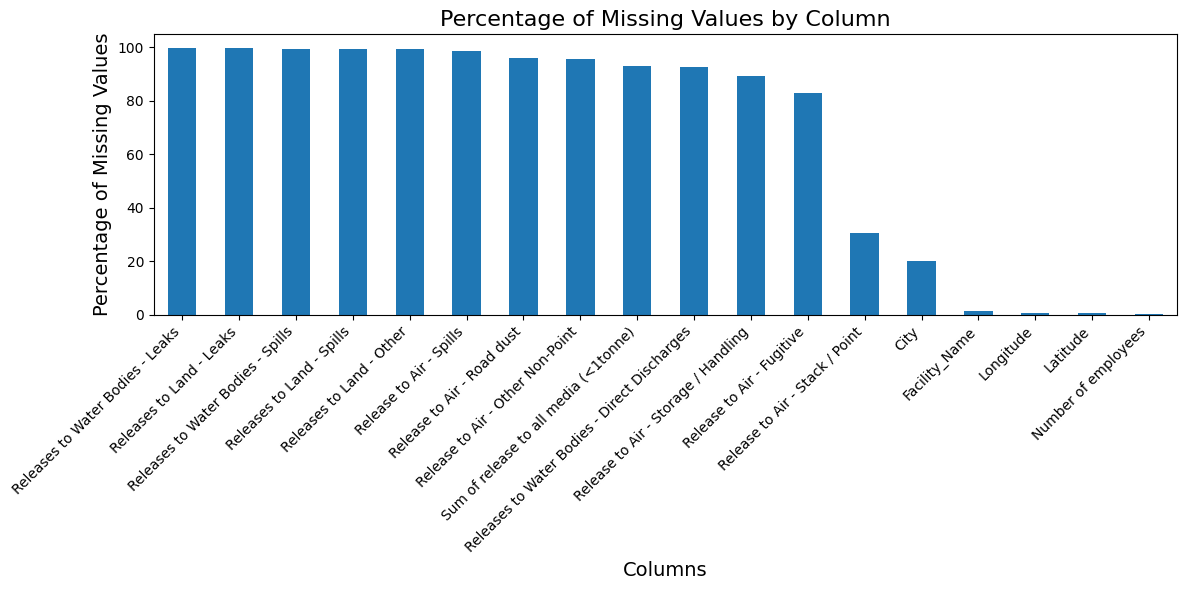

In [ ]:
# Calculate percentage of missing values in each column
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / len(df)) * 100
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: 'Percentage'})
missing_values_table = missing_values_table[missing_values_table['Missing Values'] > 0].sort_values('Percentage', ascending=False)

# Display table of missing values
print(f"Total number of rows in dataset: {len(df)}")
print("\nColumns with missing values:")
print(missing_values_table)
print('\n')

# Create bar chart of missing value percentages
plt.figure(figsize=(12, 6))
missing_values_table['Percentage'].plot(kind='bar')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage of Missing Values', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. Visualization for Missing Data Patterns

We will now create visualizations to explore any patterns within the missing values.

<Figure size 1600x800 with 0 Axes>

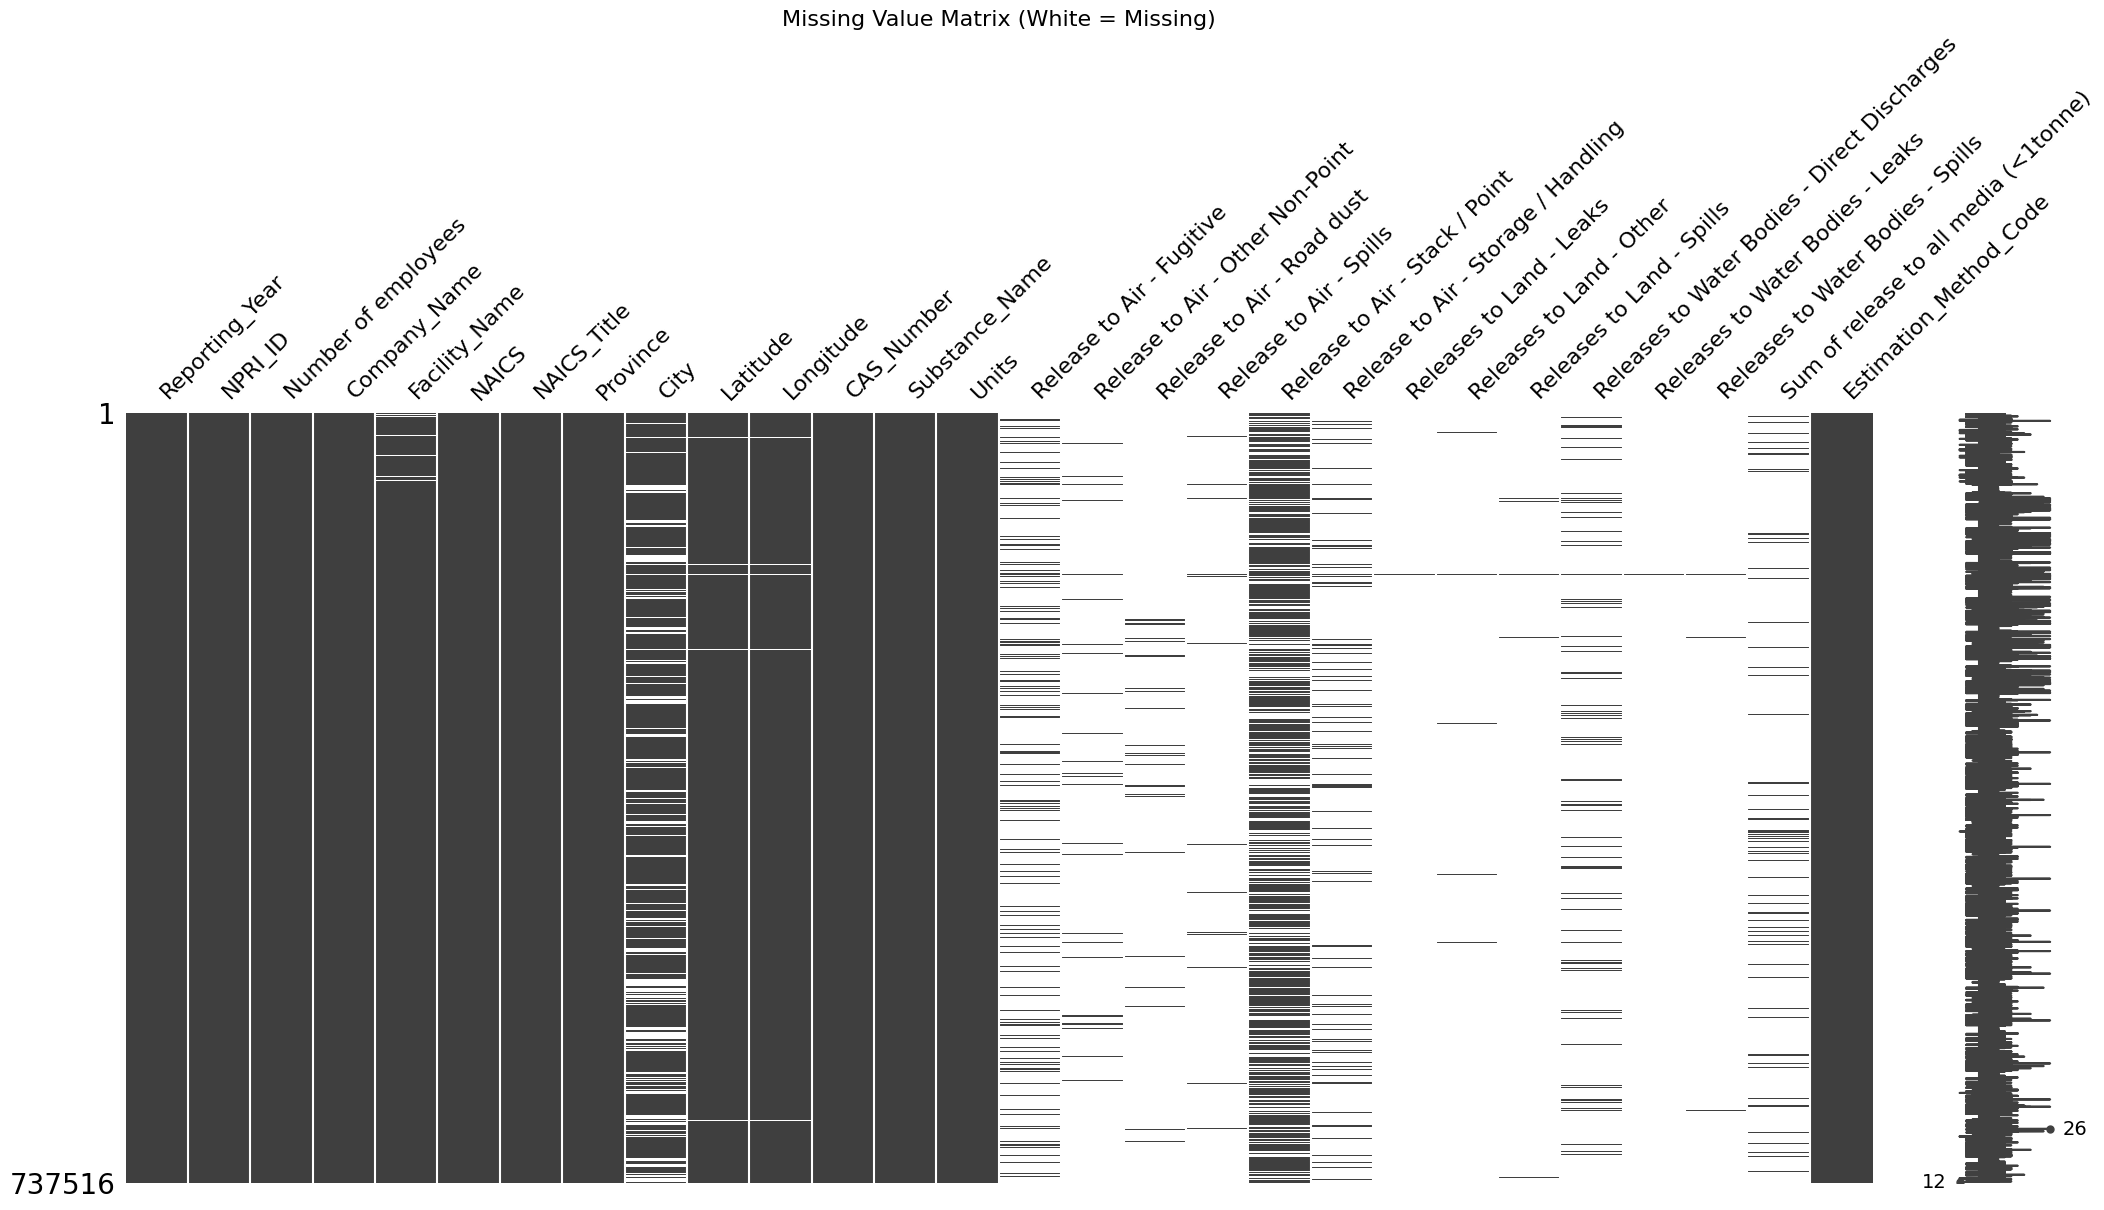

<Figure size 1400x1200 with 0 Axes>

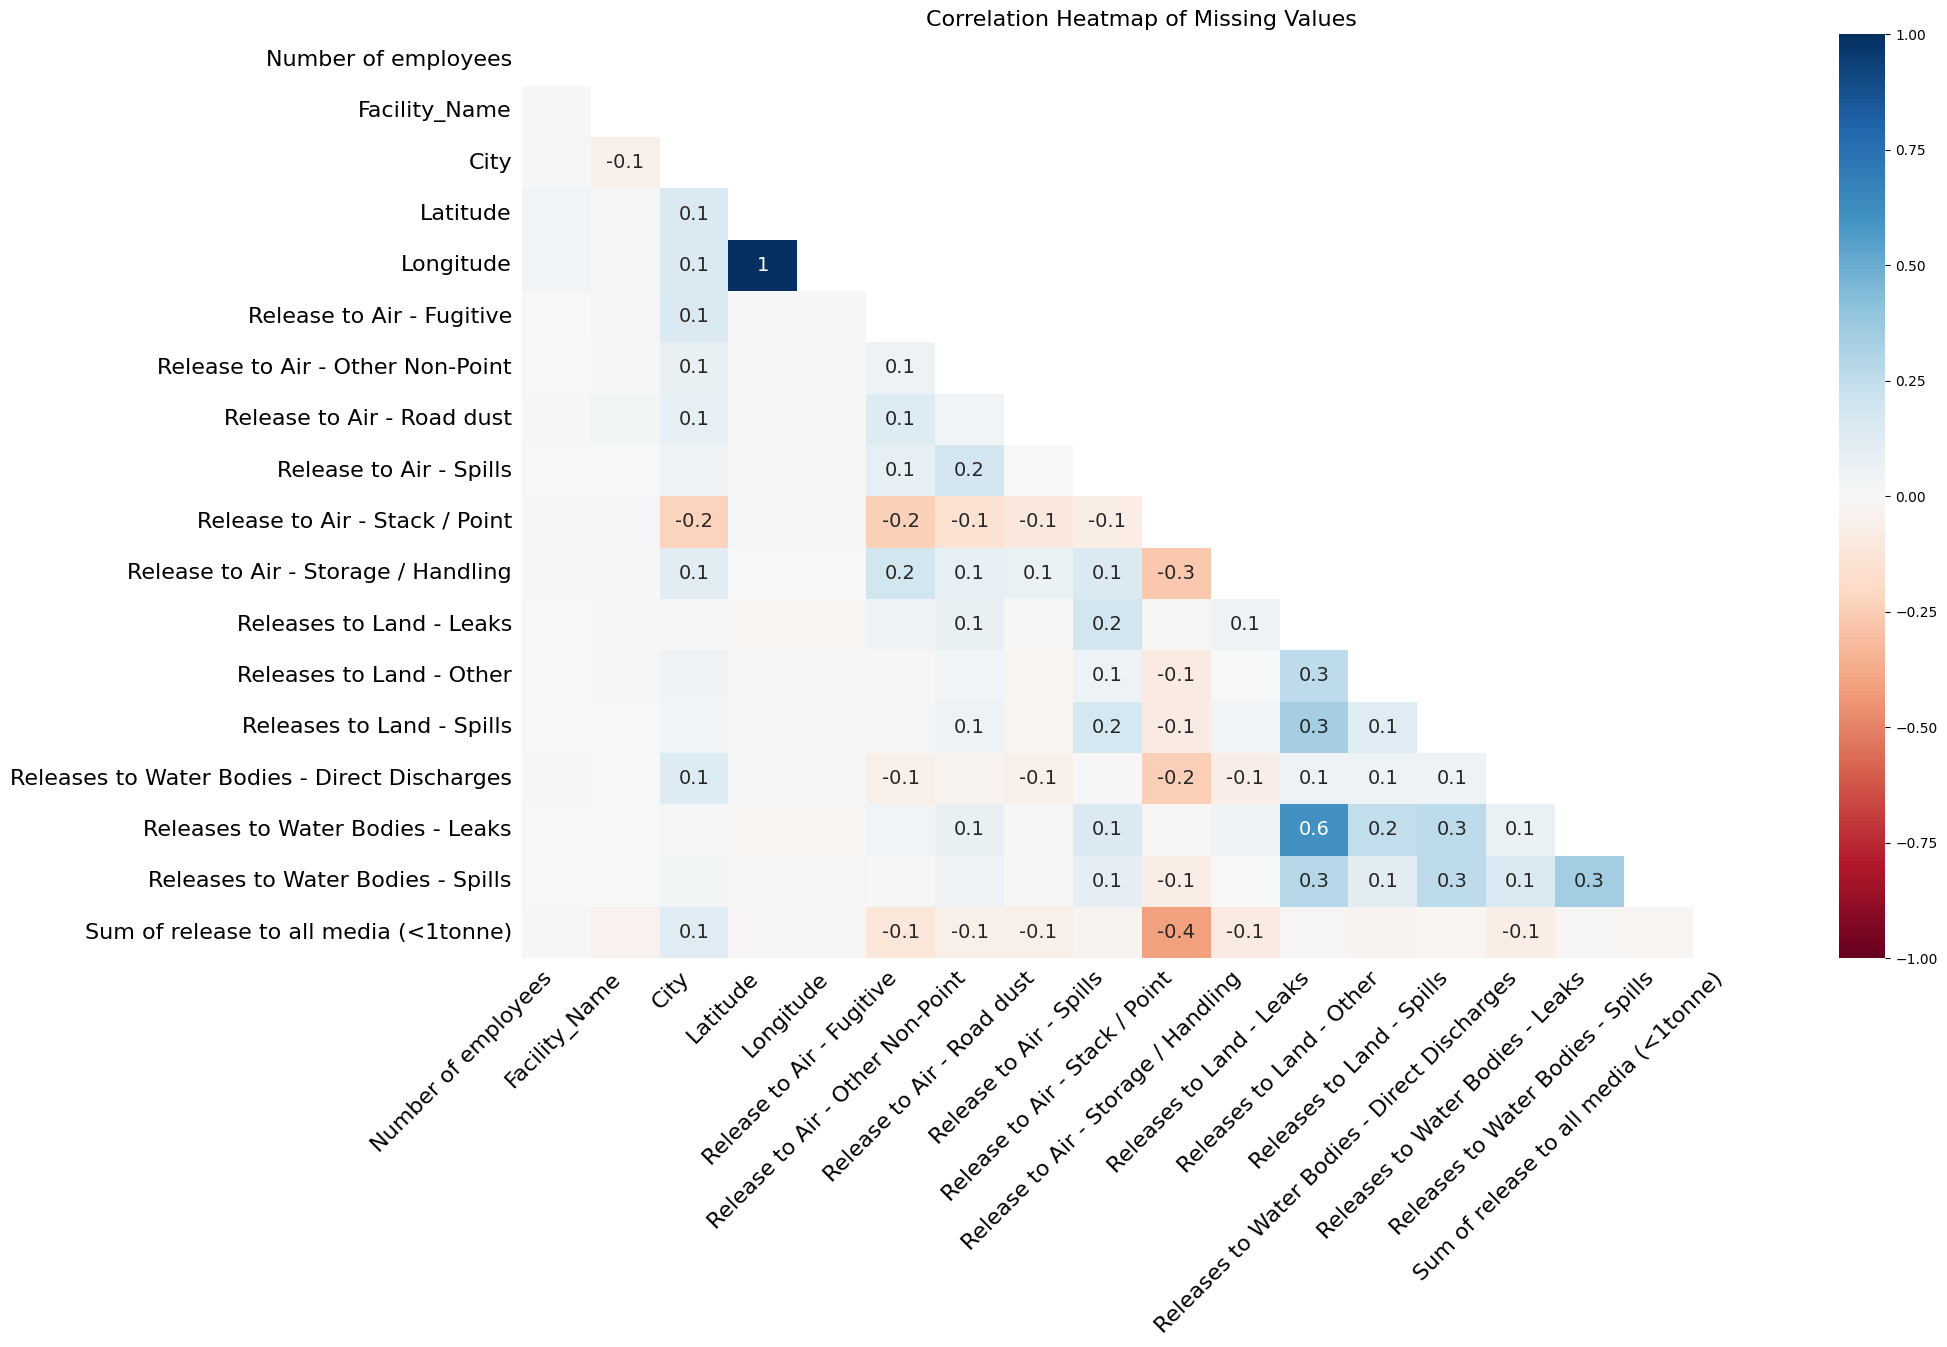

<Figure size 1000x600 with 0 Axes>

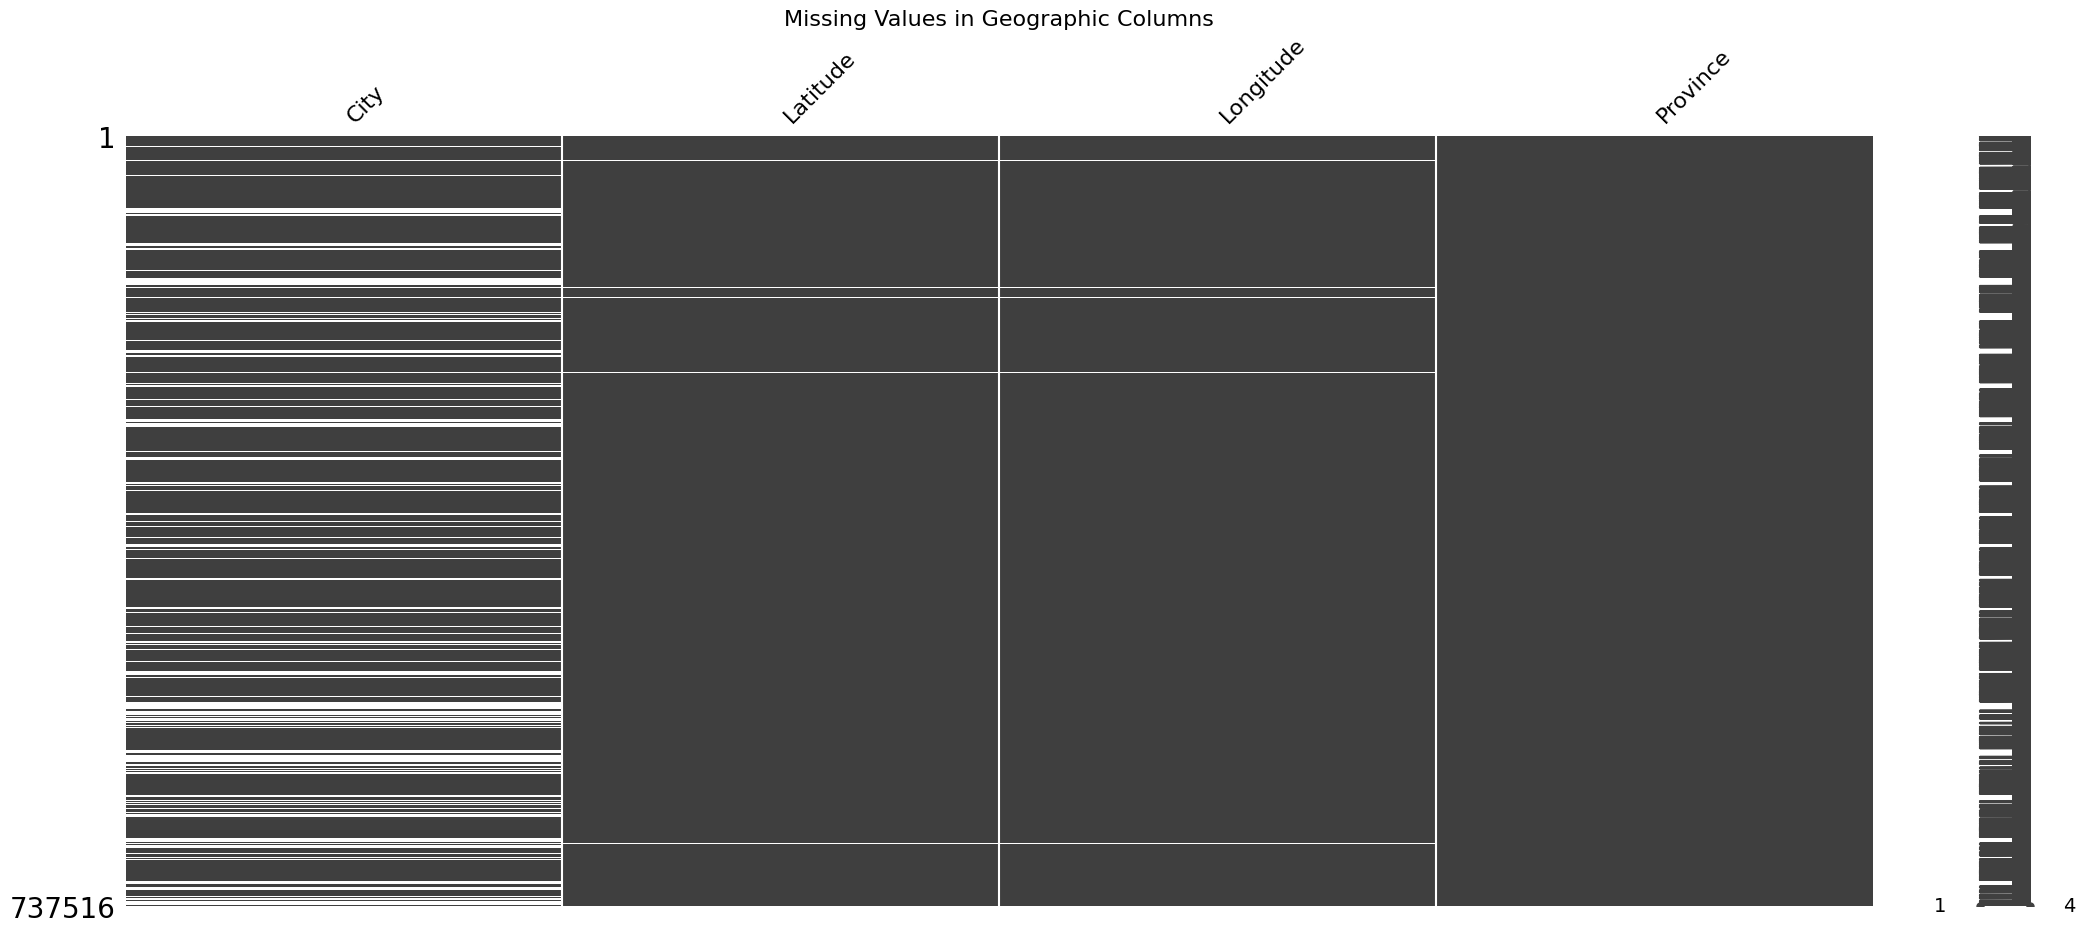

In [ ]:
# Import library for missing value visualization
import missingno as msno

# Matrix plot showing missingness patterns
plt.figure(figsize=(16, 8))
msno.matrix(df)
plt.title('Missing Value Matrix (White = Missing)', fontsize=16)
plt.show()

# Correlation heatmap of missingness
plt.figure(figsize=(14, 12))
msno.heatmap(df)
plt.title('Correlation Heatmap of Missing Values', fontsize=16)
plt.show()

# For specific columns of interest (e.g., geographic data)
cols_of_interest = ['City', 'Latitude', 'Longitude', 'Province']
plt.figure(figsize=(10, 6))
msno.matrix(df[cols_of_interest])
plt.title('Missing Values in Geographic Columns', fontsize=16)
plt.show()

### Conclusions from the Missing Data Visualizations

1. **Missing Value Matrix (White = Missing):**
   - Certain columns (e.g., `Reporting Year`, `Number of employees`) appear to have few or no missing values (mostly black), suggesting these features are relatively complete.
   - Other columns exhibit significant gaps (white regions), indicating a high volume of missing data. This could point to incomplete reporting or data collection issues.
   - The pattern of missing values varies across columns—some are sporadic (random-looking missingness), while others show more systematic or block-like patterns, suggesting potential structural reasons for why data might be missing (e.g., certain records or subsets not reporting specific attributes).

2. **Correlation Heatmap of Missing Values:**
   - **Latitude and Longitude** missingness shows a strong positive correlation (near 1.0), meaning if one is missing, the other is very likely to be missing as well. This implies location data tends to be absent together, possibly indicating a reporting omission for facilities without precise location details.
   - Some columns display negative correlations, suggesting that if data is missing in one feature, it is more likely present in another. This can hint at underlying data-collection processes where certain attributes are recorded together.
   - The presence of both positive and negative correlations among missing values indicates the data is not missing completely at random (MCAR). Instead, there may be underlying factors or processes that drive which records and fields are reported.

3. **Implications for Data Cleaning and Imputation:**
   - **Not Random Missingness:** The correlations in missing data mean that standard imputation methods (e.g., mean imputation) might introduce bias if the mechanisms of missingness are not accounted for.
   - **Location Data Considerations:** The strong linkage between missing latitude and longitude suggests you might treat these features jointly when imputing or deciding how to handle missing location data.
   - **Potential Need for Domain Knowledge:** Columns with systematic blocks of missingness may require domain-specific knowledge or alternative data sources to fill in the gaps properly.




### Compare Data Before and After Imputing Missing Values

1. **Backing Up the Data:**
   - The code starts by creating a complete copy of the DataFrame to preserve its original state. This ensures that the original data remains intact and is available for comparison after performing any imputation.

2. **Descriptive Statistics for Analysis:**
   - It then computes descriptive statistics for the `Latitude` and `Longitude` columns using the `.describe()` method. This provides a baseline for the data's distribution, allowing you to evaluate the effects of imputation on these columns later in your workflow.

This approach is especially useful when you want to assess the impact of data cleaning or imputation by comparing the data's distribution before and after the process.


In [ ]:
# First, make a copy of the original dataframe before imputation
df_before_imputation = df.copy()

# Example: For analyzing the impact of latitude/longitude imputation
# Store descriptive statistics before imputation
lat_before = df_before_imputation['Latitude'].describe()
long_before = df_before_imputation['Longitude'].describe()



We first use isnull() to quantify the number of missing values in each column.

In [ ]:
df.replace(r'^\s*$', None, regex=True, inplace=True)
df.isnull().sum()


Reporting_Year                                       0
NPRI_ID                                              0
Number of employees                                790
Company_Name                                         0
Facility_Name                                    10230
NAICS                                                0
NAICS_Title                                          0
Province                                             0
City                                            148744
Latitude                                          4082
Longitude                                         4082
CAS_Number                                           0
Substance_Name                                       0
Units                                                0
Release to Air - Fugitive                       612484
Release to Air - Other Non-Point                706636
Release to Air - Road dust                      707655
Release to Air - Spills                         728335
Release to Air - Stack / Point                  224234
Release to Air - Storage / Handling             657512
Releases to Land - Leaks                        736606
Releases to Land - Other                        731848
Releases to Land - Spills                       733046
Releases to Water Bodies - Direct Discharges    684328
Releases to Water Bodies - Leaks                736774
Releases to Water Bodies - Spills               734436
Sum of release to all media (<1tonne)           687331
Estimation_Method_Code                               0
dtype: int64

# 4. Handling Missing Values - ALMA SORIA

---
# **Author : ALMA SORIA**


Domain-Specific Approach to Missing Values in NPRI Data:

Environmental reporting datasets like NPRI have specific patterns of missing data that require domain knowledge.

We will decide on our imputation strategy based on data type and distribution and apply appropriate techniques.

Missing values can iuntroduce bias or reduce the effectiveness of models. Proper handling is necessary to retain useful information while minimizing any distortions.

## Number of employees
- Strategy: Impute with median values grouped by NAICS code
- Rationale: Facilities within the same industry typically have similar staffing patterns

In [ ]:
# Missing value count before imputation
print(f'Missing value count before imputation: {df["Number of employees"].isnull().sum()}')

# Fill missing values with the group median
df['Number of employees'] = df['Number of employees'].fillna(
    df.groupby('NAICS', observed=False)['Number of employees'].transform('median')
)

# Fill any remaining missing values with the overall median
df['Number of employees'] = df['Number of employees'].fillna(df['Number of employees'].median())

# Missing value count after imputation
print(f'Missing value count after imputation: {df["Number of employees"].isnull().sum()}')

Missing value count before imputation: 790
Missing value count after imputation: 0


## Facility_Name

- Strategy: Replace with Company_Name + " (unnamed facility)"
- Rationale: The facility name is primarily for identification, not crucial for analytical purposes

In [ ]:
# Missing value count before imputation
print(f'Missing value count before imputation: {df["Facility_Name"].isnull().sum()}')

df["Facility_Name"] = df["Facility_Name"].fillna(
    df["Company_Name"].astype(str) + " (unnamed facility)"
)

# Missing value count after imputation
print(f'Missing value count after imputation: {df["Facility_Name"].isnull().sum()}')


Missing value count before imputation: 10230
Missing value count after imputation: 0


## City

There are some values that do have Province, Latitude and Longitude. It's relatively easy to find out the city, so we will imputate the corresponding City.

In the cases where Latitude and Longitude are missing, we will impute the capital of the corresponding Province.

- If Latitude and Longitude are available, attempt to determine the City via reverse geocoding.

- If Latitude or Longitude are missing, fall back to using the capital city of the corresponding Province.


Install and Import Geopy for Reverse Geocoding
To impute the city from Latitude/Longitude, you can use Geopy. If you don’t already have it installed, do so with:

In [ ]:
!pip install reverse_geocoder



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268068 sha256=e4f3ea1981ed7598351d720e1f5765b41a4e40f548369fb3f54e8f01dfbe6e7f
  Stored in directory: /root/.cache/pip/wheels/17/3c/41/2bc89719586c2a5c53e9a527daa76a968a1288315c1ae2d904
Successfully built reverse_geocoder


In [ ]:
#1) Prepare a Province-to-Capital Mapping
# First, create a dictionary that maps each province to its capital.

province_capitals = {
    "ab": "edmonton",
    "bc": "victoria",
    "mb": "winnipeg",
    "nb": "fredericton",
    "nl": "st. john's",
    "ns": "halifax",
    "nt": "yellowknife",
    "nu": "iqaluit",
    "on": "toronto",
    "pe": "charlottetown",
    "qc": "quebec city",
    "sk": "regina",
    "yt": "whitehorse"
}



Use reverse_geocoder to Build a Cache of Coordinate-to-City Mappings:

In [ ]:
import pandas as pd
import numpy as np
import reverse_geocoder as rg

# Select rows that have valid Latitude and Longitude
mask = df['Latitude'].notna() & df['Longitude'].notna()
coords_df = df.loc[mask, ['Latitude', 'Longitude']].drop_duplicates()

# Convert to a list of (lat, lon) tuples
coords_list = list(coords_df.itertuples(index=False, name=None))

# Run offline reverse geocoding (this returns a list of dicts with keys like 'name')
results = rg.search(coords_list)

# Build a mapping from coordinate tuple to the city name
coord_to_city = {coord: res['name'] for coord, res in zip(coords_list, results)}


Loading formatted geocoded file...


In [ ]:
def fill_city_simple(row):
    # If City is already known, keep it
    if pd.notna(row['City']):
        return row['City']

    # If coordinates exist, use the cached reverse geocoding result
    if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
        coord = (row['Latitude'], row['Longitude'])
        if coord in coord_to_city:
            return coord_to_city[coord]

    # If coordinates are missing or not found, use the province capital
    return province_capitals.get(row['Province'], "unknown")

# Missing value count before imputation
print(f'Missing value count before imputation: {df["City"].isnull().sum()}')

df['City'] = df.apply(fill_city_simple, axis=1)

df['City'] = df['City'].str.strip() # Convert City imputations to lower case to standardized

# Missing value count after imputation
print(f'Missing value count after imputation: {df["City"].isnull().sum()}')

Missing value count before imputation: 148744
Missing value count after imputation: 0


## Latitude/Longitude

For records with missing coordinates, we leveraged the information already present in our dataset. We grouped the data by City and computed the median for both Latitude and Longitude within each group.

Missing coordinate values were then replaced with the corresponding group medians. This approach ensures that, for any given city, the missing coordinates are imputed with a representative value derived from the available data, without relying on external geocoding services.


In [ ]:
# Missing value counts before imputation
print(f'Missing value count for Latitude before imputation: {df["Latitude"].isnull().sum()}')
print(f'Missing value count for Longitude before imputation: {df["Longitude"].isnull().sum()}')

# Fill missing Latitude and Longitude using the median for each city
df['Latitude'] = df['Latitude'].fillna(df.groupby('City')['Latitude'].transform('median'))
df['Longitude'] = df['Longitude'].fillna(df.groupby('City')['Longitude'].transform('median'))

# Missing value counts after imputation
print(f'Missing value count for Latitude after imputation: {df["Latitude"].isnull().sum()}')
print(f'Missing value count for Longitude after imputation: {df["Longitude"].isnull().sum()}')

Missing value count for Latitude before imputation: 4082
Missing value count for Longitude before imputation: 4082
Missing value count for Latitude after imputation: 0
Missing value count for Longitude after imputation: 0


In [ ]:
# Check our current missing values
print(df.isnull().sum())

Reporting_Year                                       0
NPRI_ID                                              0
Number of employees                                  0
Company_Name                                         0
Facility_Name                                        0
NAICS                                                0
NAICS_Title                                          0
Province                                             0
City                                                 0
Latitude                                             0
Longitude                                            0
CAS_Number                                           0
Substance_Name                                       0
Units                                                0
Release to Air - Fugitive                       612484
Release to Air - Other Non-Point                706636
Release to Air - Road dust                      707655
Release to Air - Spills                         728335
Release to

## Release Columns

###General Strategy for All Release Columns:

Strategy: Replace missing values with 0

Rationale: In environmental reporting, unreported releases often indicate no release occurred.

The high percentage of missing values (30-99%) suggests these are intentionally left blank for zero releases.

This approach is standard practice in environmental emissions analysis.

In [ ]:
df.head()

Reporting_Year  NPRI_ID  Number of employees                           Company_Name                                      Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
0            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867  10049-04-4   chlorine dioxide  tonnes                        NaN                               NaN                         NaN                      NaN                           5.200                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      M
1            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-56-1           methanol  tonnes                        NaN                               NaN                         NaN                      NaN                         113.000                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
2            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-66-3         chloroform  tonnes                        NaN                               NaN                         NaN                      NaN                             NaN                                  NaN                       NaN                       NaN                        NaN                                           0.0                               NaN                                NaN                                    NaN                      M
3            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     75-07-0       acetaldehyde  tonnes                        NaN                               NaN                         NaN                      NaN                           7.670                                  NaN                       NaN                       NaN                        NaN                                           NaN                               NaN                                NaN                                    NaN                      E
4            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867   7647-01-0  hydrochloric acid  tonnes                        NaN                               NaN                         NaN                      NaN                           0.665                                  NaN                       NaN                       NaN                    

In [ ]:
# List all release columns exactly as they appear in your DataFrame
release_cols = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills'
]

# Replace missing values with 0 in these columns
df[release_cols] = df[release_cols].fillna(0)


In [ ]:
print(df.isnull().sum())

Reporting_Year                                       0
NPRI_ID                                              0
Number of employees                                  0
Company_Name                                         0
Facility_Name                                        0
NAICS                                                0
NAICS_Title                                          0
Province                                             0
City                                                 0
Latitude                                             0
Longitude                                            0
CAS_Number                                           0
Substance_Name                                       0
Units                                                0
Release to Air - Fugitive                            0
Release to Air - Other Non-Point                     0
Release to Air - Road dust                           0
Release to Air - Spills                              0
Release to

## Sum of release to all media (<1tonne)

Strategy: Calculate from component values rather than imputing

Rationale: This appears to be a derived field used only when total releases are below 1 tonne


In [ ]:
# Replace missing values based on sum of other columns
# Only populate for cases where total is actually < 1 tonne
total_releases = df[release_cols].sum(axis=1)
df['Sum of release to all media (<1tonne)'] = df.apply(
    lambda row: total_releases[row.name] if pd.isna(row['Sum of release to all media (<1tonne)'])
    and total_releases[row.name] < 1 else row['Sum of release to all media (<1tonne)'], axis=1
)
# Replace remaining missing values with 0
df['Sum of release to all media (<1tonne)'] = df['Sum of release to all media (<1tonne)'].fillna(0)

In [ ]:
print(df.isnull().sum())


Reporting_Year                                  0
NPRI_ID                                         0
Number of employees                             0
Company_Name                                    0
Facility_Name                                   0
NAICS                                           0
NAICS_Title                                     0
Province                                        0
City                                            0
Latitude                                        0
Longitude                                       0
CAS_Number                                      0
Substance_Name                                  0
Units                                           0
Release to Air - Fugitive                       0
Release to Air - Other Non-Point                0
Release to Air - Road dust                      0
Release to Air - Spills                         0
Release to Air - Stack / Point                  0
Release to Air - Storage / Handling             0


## Missing Values Imputation Comparison Overview - Latitude & Longitude

1. **Descriptive Statistics After Imputation:**
   - The code calculates descriptive statistics for the `Latitude` and `Longitude` columns after imputation using the `.describe()` method. This generates summary statistics (such as mean, std, min, max, and percentiles) for the imputed data.

2. **Comparison of Statistics Before and After Imputation:**
   - A new DataFrame named `comparison` is created to consolidate the descriptive statistics computed before and after imputation.
   - This DataFrame includes:
     - `Latitude_Before` and `Latitude_After` for latitude statistics.
     - `Longitude_Before` and `Longitude_After` for longitude statistics.
   - The comparison is printed to the console to allow for a side-by-side evaluation of how imputation has affected the data.

3. **Visualization of Data Distributions:**
   - The code sets up a figure with two subplots (one for latitude and one for longitude) to visually compare the distributions before and after imputation.
   - **Latitude Distribution:**
     - Overlaid histograms display the original latitude distribution (in blue) and the imputed latitude distribution (in red) along with Kernel Density Estimation (KDE) curves.
   - **Longitude Distribution:**
     - Similarly, overlaid histograms illustrate the distribution of longitude values before (blue) and after (red) imputation.
   - Titles and legends are added to each subplot to enhance clarity.

4. **Final Display:**
   - The layout is adjusted for a clean presentation using `plt.tight_layout()`.
   - The complete visualization is rendered using `plt.show()`.


Comparison of statistics before and after geographic imputation:
       Latitude_Before  Latitude_After  Longitude_Before  Longitude_After
count    733434.000000   737516.000000     733434.000000    737516.000000
mean         49.644636       49.636706        -97.375436       -97.336905
std           5.155658        5.149746         20.184399        20.181792
min           0.000000        0.000000       -140.883600      -140.883600
25%          45.431000       45.429840       -114.767700      -114.750600
50%          49.795100       49.791100       -104.630100      -104.614410
75%          53.508500       53.508500        -79.540060       -79.532000
max          82.498758       82.498758          0.000000         0.000000


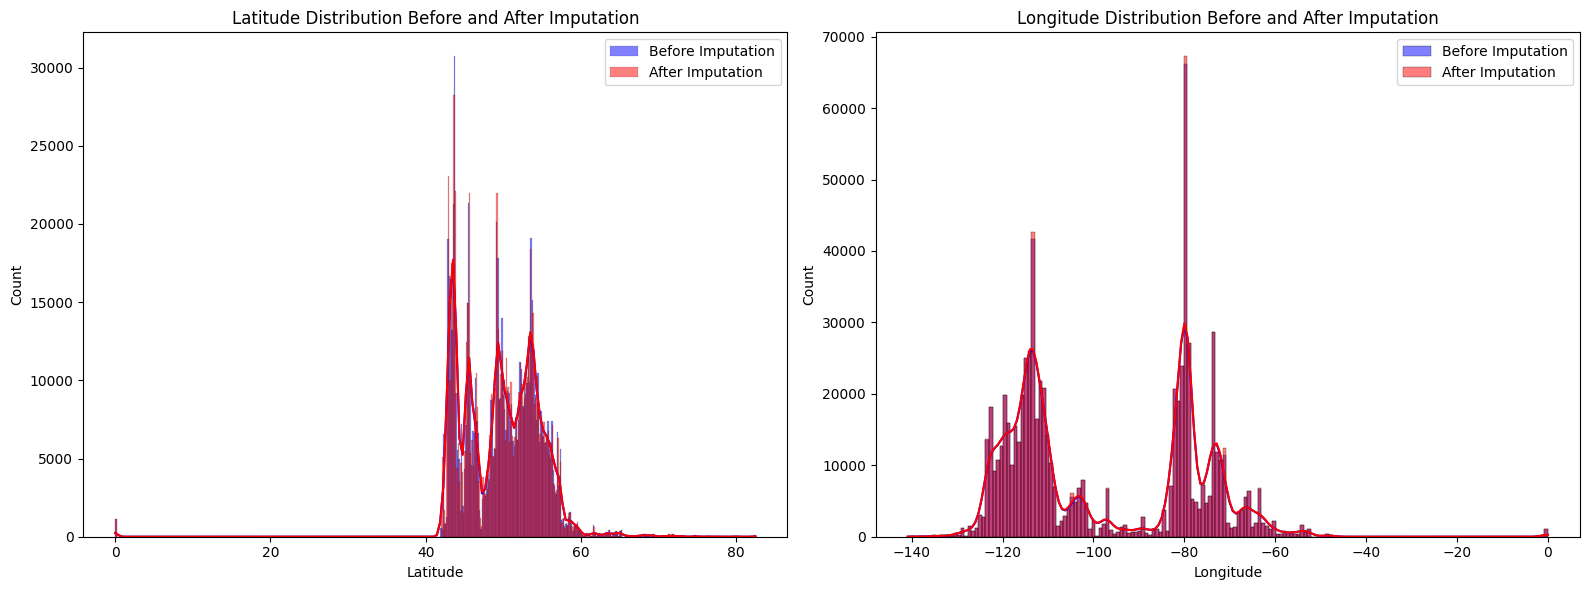

In [ ]:
# Store descriptive statistics after imputation
lat_after = df['Latitude'].describe()
long_after = df['Longitude'].describe()

# Compare statistics before and after imputation
comparison = pd.DataFrame({
    'Latitude_Before': lat_before,
    'Latitude_After': lat_after,
    'Longitude_Before': long_before,
    'Longitude_After': long_after
})
print("Comparison of statistics before and after geographic imputation:")
print(comparison)

# Visualize distribution before and after imputation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Latitude distribution
sns.histplot(df_before_imputation['Latitude'].dropna(), kde=True, ax=axes[0], color='blue', alpha=0.5, label='Before Imputation')
sns.histplot(df['Latitude'], kde=True, ax=axes[0], color='red', alpha=0.5, label='After Imputation')
axes[0].set_title('Latitude Distribution Before and After Imputation')
axes[0].legend()

# Longitude distribution
sns.histplot(df_before_imputation['Longitude'].dropna(), kde=True, ax=axes[1], color='blue', alpha=0.5, label='Before Imputation')
sns.histplot(df['Longitude'], kde=True, ax=axes[1], color='red', alpha=0.5, label='After Imputation')
axes[1].set_title('Longitude Distribution Before and After Imputation')
axes[1].legend()

plt.tight_layout()
plt.show()

### Conclusions from Latitude & Longitude Distributions

1. **Overall Similarity of Distributions:**
   - The red (after imputation) and blue (before imputation) histograms largely overlap for both latitude and longitude, indicating that the imputation process did not drastically alter the overall shape of the data distribution.

2. **Minimal Shifts in Central Tendency:**
   - Although the distributions appear similar, there may be slight shifts in the mean or median values. A quick glance at the peaks suggests that the imputed data closely follows the original trends, but checking the summary statistics (mean, median) provides precise insights into any subtle changes.

3. **Consistency in Spread and Range:**
   - The range and spread (standard deviation) of the data remain fairly consistent. Large deviations would be visible as a significant difference in the histogram tails, which is not evident here.

4. **Preservation of Key Patterns:**
   - Key features in the data—such as major peaks or clusters—are retained after imputation, suggesting that the chosen imputation strategy is reasonably preserving the underlying geographic patterns.




##  Missing Values Imputation Comparison Overview - City

Number of missing city values before imputation: 148744
Percentage of missing city values before imputation: 20.17%
Number of missing city values after imputation: 0
Percentage of missing city values after imputation: 0.00%


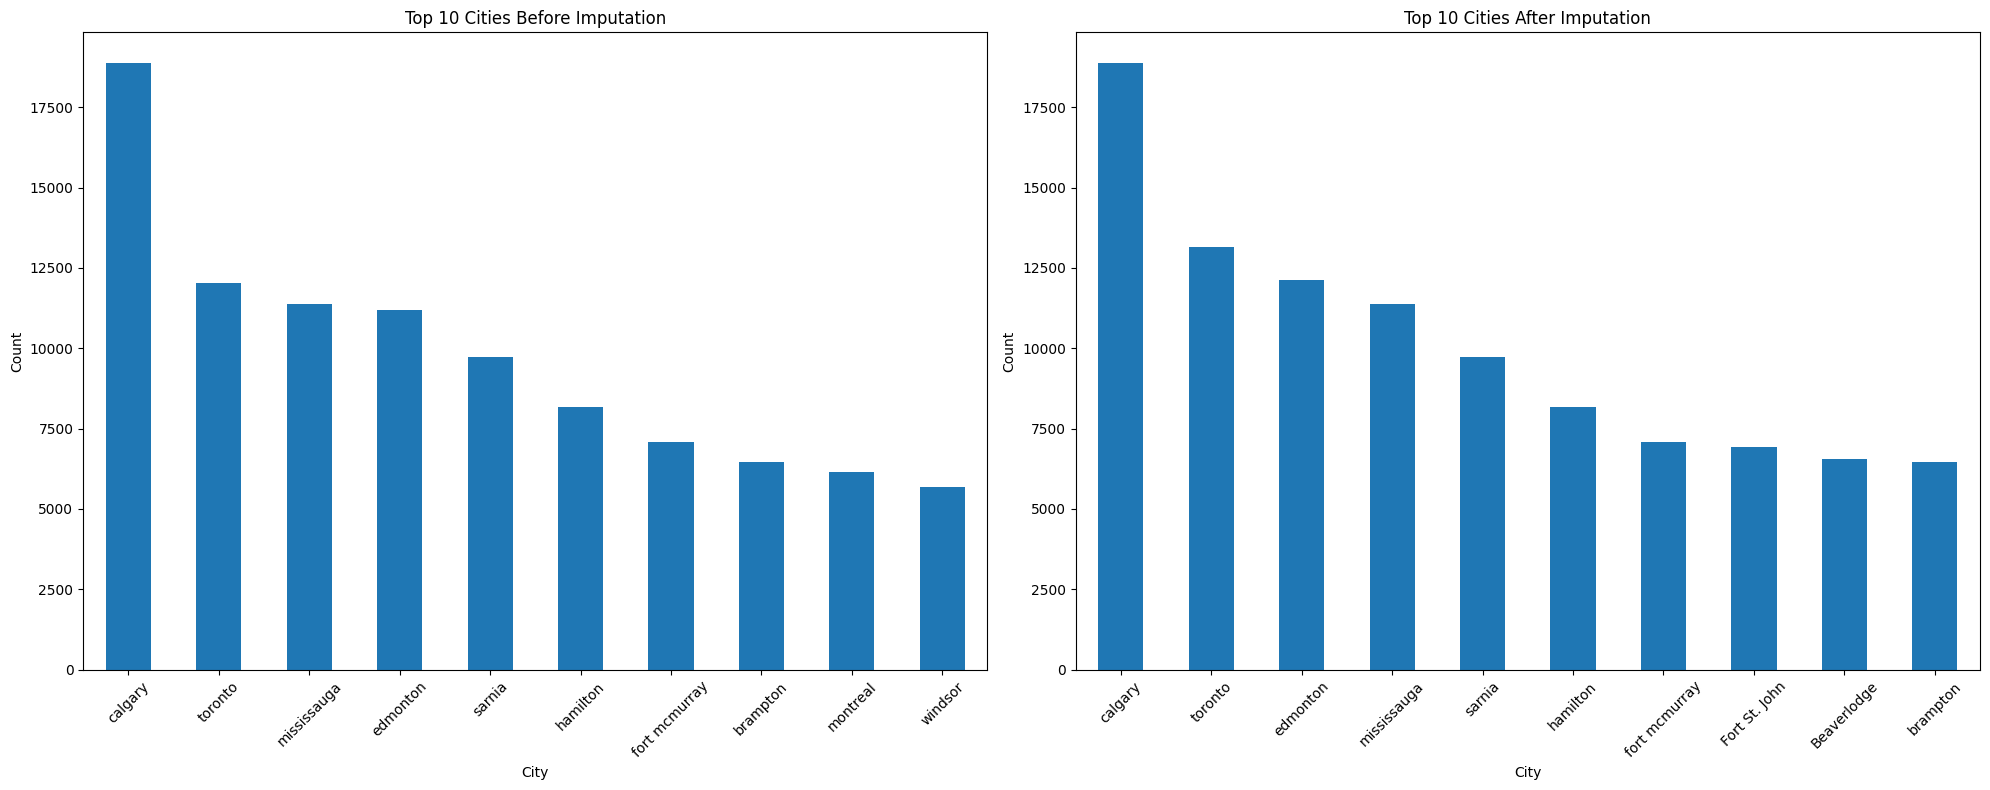

In [ ]:
# Analyze the impact of city imputation
# Count of missing cities before imputation
missing_cities_before = df_before_imputation['City'].isna().sum()
print(f"Number of missing city values before imputation: {missing_cities_before}")
print(f"Percentage of missing city values before imputation: {missing_cities_before/len(df)*100:.2f}%")

# Count of missing cities after imputation
missing_cities_after = df['City'].isna().sum()
print(f"Number of missing city values after imputation: {missing_cities_after}")
print(f"Percentage of missing city values after imputation: {missing_cities_after/len(df)*100:.2f}%")

# Analyze city distribution before and after imputation
top_cities_before = df_before_imputation['City'].dropna().value_counts().head(10)
top_cities_after = df['City'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Top cities before imputation
top_cities_before.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 Cities Before Imputation')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Top cities after imputation
top_cities_after.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Cities After Imputation')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Conclusions from the Top 10 Cities Analysis

1. **Consistency in Top Cities:**
   - The leading cities before and after imputation remain largely the same. This indicates that the imputation process did not drastically alter which locations appear most frequently in the dataset.

2. **Slight Changes in Rankings or Counts:**
   - While the top city often stays in the same position, there may be minor shifts in the order or counts of the remaining cities. These differences can be attributed to the handling of missing values (e.g., previously unassigned records now being attributed to certain cities).

3. **Impact of Imputation on Data Completeness:**
   - An increase in total counts for certain cities suggests that records which were missing city information might have been successfully imputed. This helps fill gaps but also underscores the importance of verifying that the imputed city data is accurate and does not introduce bias.




# 5. Handling Outliers - Angela Lekivetz
# **Author : Angela Lekivetz**

We will identify any outliers using statistical techniques.

Outliers can distort statistical summaries and impact predictive mdoels. Identifying and handling them approproately ensures data reliability.

## Release Columns

In [ ]:
release_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

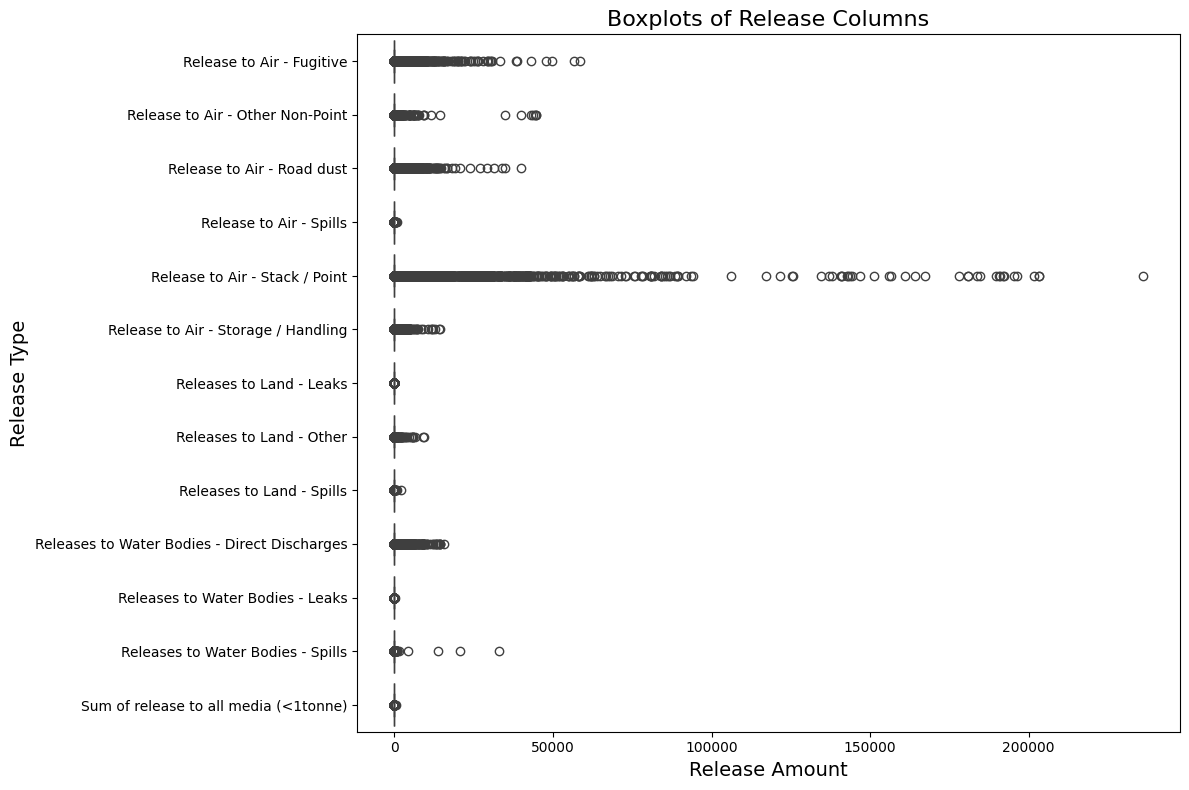

In [ ]:
# Are there outliers in the release columns?

# Create boxplots for all release columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[release_columns], orient='h')
plt.title('Boxplots of Release Columns', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

### Log Transformation

Due to our method of imputing missing values with 0 for the release columns, we will consider applying a log transformation to release columns.

This transformation reduces skewness in data, large variations in scale, and will help handle zeroes in our data since log(0) is undefined.

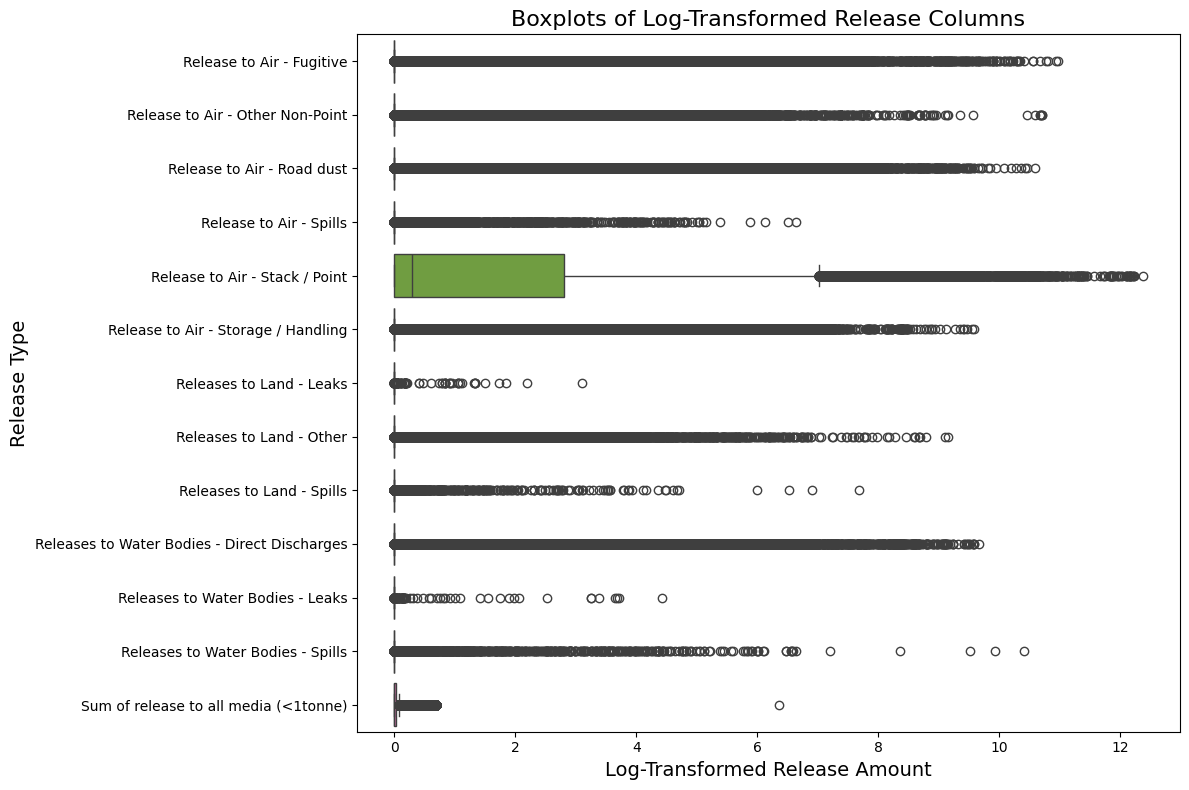

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=np.log1p(df[release_columns]), orient='h')
plt.title('Boxplots of Log-Transformed Release Columns', fontsize=16)
plt.xlabel('Log-Transformed Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()

### Methods of Outlier Detection - Release Columns

We will now compare and contrast various outlier detection methods:

A. IQR Method
B. IQR Method Omitting Zeroes
C. Z-Score Method

#### A. IQR Method

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply IQR method to each release column
iqr_results = {}
for col in release_columns:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    iqr_results[col] = {
        'outliers': outliers,
        'lower_bound': lb,
        'upper_bound': ub,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (IQR): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
    print(f"Lower bound: {lb:.4f}, Upper bound: {ub:.4f}")
    print("-" * 50)

Column: Release to Air - Fugitive
Number of outliers (IQR): 116540
Percentage of outliers: 15.80%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Release to Air - Other Non-Point
Number of outliers (IQR): 27128
Percentage of outliers: 3.68%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Release to Air - Road dust
Number of outliers (IQR): 28669
Percentage of outliers: 3.89%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Release to Air - Spills
Number of outliers (IQR): 4862
Percentage of outliers: 0.66%
Lower bound: 0.0000, Upper bound: 0.0000
--------------------------------------------------
Column: Release to Air - Stack / Point
Number of outliers (IQR): 117917
Percentage of outliers: 15.99%
Lower bound: -23.3910, Upper bound: 38.9850
--------------------------------------------------
Column: Release to Air - Storage / Handling

We see from the summary above that, for the majority of our release columns, Q1 and Q3 are both zero, which results in no meaningful bounds for detecting outliers.


#### B. IQR Method Omitting Zeroes

Due to the number of imputed zeroes in our release columns, we will attempt applying the IQR method while excluding any zero values.

This method will ensure that the zero values do not skew the IQR bounds and the outlier detection process.

In [ ]:
def detect_outliers_iqr_omit_zero(df, column):
    """
    Detect outliers using IQR method, omitting zero values from the IQR calculation.
    Values outside the lower and upper bounds (calculated using IQR and multiplier)
    are considered outliers.
    """
    # Exclude zero values from the column
    non_zero_column = df[df[column] != 0][column]

    # Calculate Q1 (25th percentile) and Q3 (75th percentile) on non-zero values
    Q1 = non_zero_column.quantile(0.25)
    Q3 = non_zero_column.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds with threshold multiplier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers beyond the bounds
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

iqr_results = {}
for col in release_columns:
    outliers, lb, ub = detect_outliers_iqr_omit_zero(df, col)
    iqr_results[col] = {
        'outliers': outliers,
        'lower_bound': lb,
        'upper_bound': ub,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (IQR): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
    print(f"Lower bound: {lb:.4f}, Upper bound: {ub:.4f}")
    print("-" * 50)


Column: Release to Air - Fugitive
Number of outliers (IQR): 18682
Percentage of outliers: 2.53%
Lower bound: -9.4758, Upper bound: 15.8969
--------------------------------------------------
Column: Release to Air - Other Non-Point
Number of outliers (IQR): 4186
Percentage of outliers: 0.57%
Lower bound: -13.4655, Upper bound: 22.5065
--------------------------------------------------
Column: Release to Air - Road dust
Number of outliers (IQR): 3971
Percentage of outliers: 0.54%
Lower bound: -33.8110, Upper bound: 58.0850
--------------------------------------------------
Column: Release to Air - Spills
Number of outliers (IQR): 896
Percentage of outliers: 0.12%
Lower bound: -0.3726, Upper bound: 0.6264
--------------------------------------------------
Column: Release to Air - Stack / Point
Number of outliers (IQR): 65881
Percentage of outliers: 8.93%
Lower bound: -53.4600, Upper bound: 89.9960
--------------------------------------------------
Column: Release to Air - Storage / Handli

#### C. Z-Score Method


In [ ]:
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-score method.
    Values beyond threshold standard deviations are considered outliers.
    """
    mean = df[column].mean()
    std = df[column].std()

    z_scores = (df[column] - mean) / std
    outliers = df[abs(z_scores) > threshold]
    return outliers, z_scores

# Apply Z-score method to each release column
zscore_results = {}
for col in release_columns:
    outliers, z_scores = detect_outliers_zscore(df, col)
    zscore_results[col] = {
        'outliers': outliers,
        'z_scores': z_scores,
        'num_outliers': len(outliers),
        'percent_outliers': len(outliers)/len(df)*100
    }
    print(f"Column: {col}")
    print(f"Number of outliers (Z-score): {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers)/len(df)*100:.2f}%")
    print(f"Min Z-score: {z_scores.min():.2f}, Max Z-score: {z_scores.max():.2f}")
    print("-" * 50)

Column: Release to Air - Fugitive
Number of outliers (Z-score): 747
Percentage of outliers: 0.10%
Min Z-score: -0.03, Max Z-score: 221.24
--------------------------------------------------
Column: Release to Air - Other Non-Point
Number of outliers (Z-score): 331
Percentage of outliers: 0.04%
Min Z-score: -0.01, Max Z-score: 317.77
--------------------------------------------------
Column: Release to Air - Road dust
Number of outliers (Z-score): 977
Percentage of outliers: 0.13%
Min Z-score: -0.03, Max Z-score: 230.10
--------------------------------------------------
Column: Release to Air - Spills
Number of outliers (Z-score): 369
Percentage of outliers: 0.05%
Min Z-score: -0.01, Max Z-score: 458.29
--------------------------------------------------
Column: Release to Air - Stack / Point
Number of outliers (Z-score): 1746
Percentage of outliers: 0.24%
Min Z-score: -0.06, Max Z-score: 147.24
--------------------------------------------------
Column: Release to Air - Storage / Handling

We can see from the above summary that the Z-score method seems to have worked well in detecting outliers across our columns. The percentage of outliers is generally quite small, with the highest being 0.24% of data points in the column.


#### Comparison

We have chosen to cap outliers, meaning that extreme values are replaced with less extreme values (e.g. upper and lower bounds defined by the IQR method).

Capping helps to reduce the influence of outliers without completely removing the data points.

##### Cap Outliers Using Z-Score Method

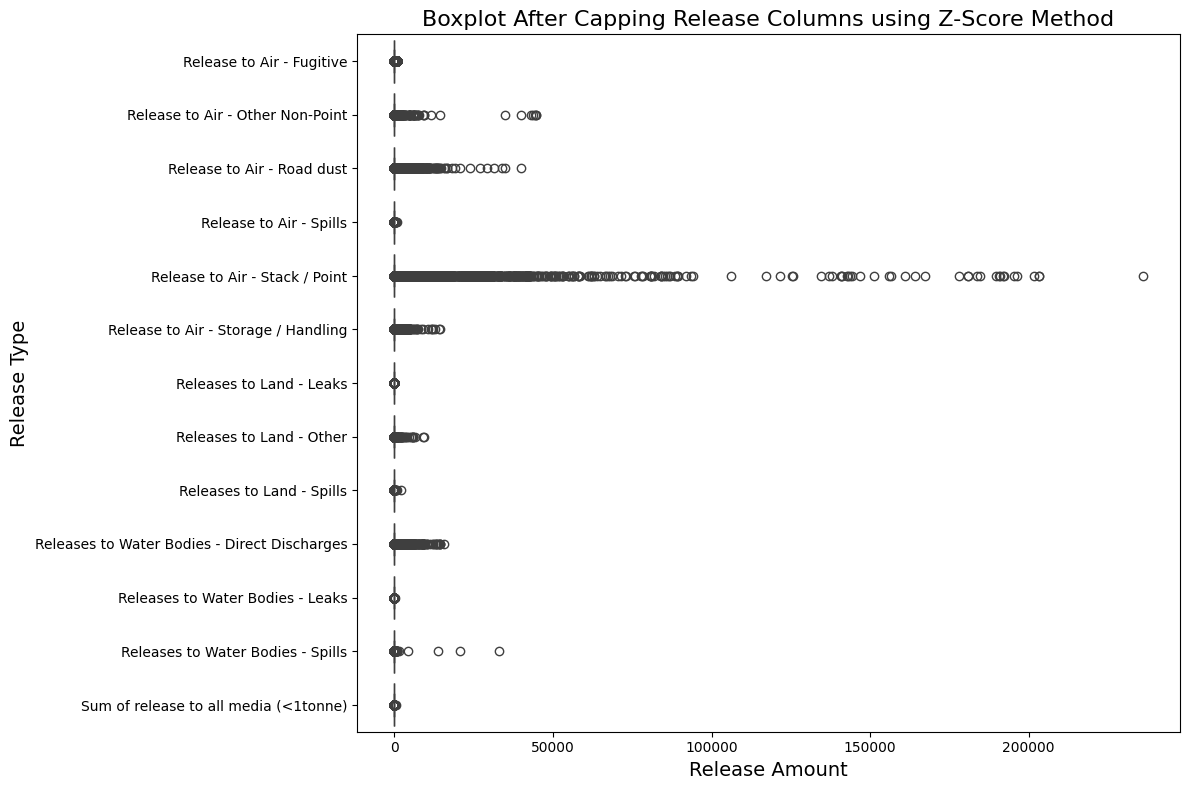

In [ ]:
def cap_outliers_zscore(df, columns, threshold=3):
    """
    Capping outliers using Z-score method.
    Any value beyond the threshold standard deviations is capped to the threshold.
    """

    for col in columns:
        # Calculate the Z-scores
        mean = df[col].mean()
        std = df[col].std()

        z_scores = (df[col] - mean) / std

        # Cap values beyond the Z-score threshold
        df[col] = np.where(z_scores > threshold, mean + threshold * std, df[col])
        df[col] = np.where(z_scores < -threshold, mean - threshold * std, df[col])

        return df

df_zscore = cap_outliers_zscore(df, release_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_zscore[release_columns], orient='h')
plt.title(f'Boxplot After Capping Release Columns using Z-Score Method', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


##### Cap Outliers Using IQR - Omitting Zeroes

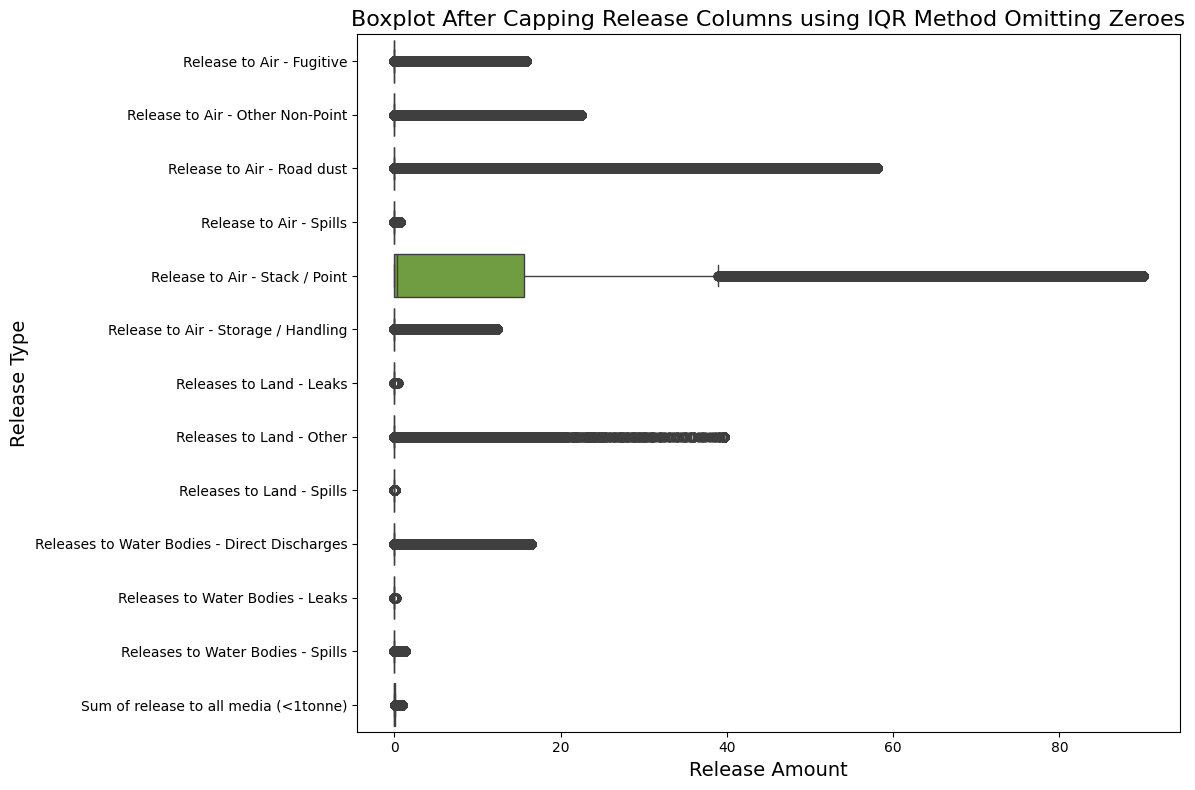

In [ ]:
def cap_outliers_iqr_omit_zero(df, columns):
    """
    Cap outliers using IQR method, omitting zero values.
    Any value below the lower bound or above the upper bound is capped to the corresponding bound.
    """

    for col in columns:
        # Exclude zero values from the column for IQR calculation
        non_zero_column = df[df[col] != 0][col]

        # Calculate Q1 (25th percentile) and Q3 (75th percentile) on non-zero values
        Q1 = non_zero_column.quantile(0.25)
        Q3 = non_zero_column.quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds using the IQR method with the threshold multiplier
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values below the lower bound and above the upper bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

df_iqr_omit_zero = cap_outliers_iqr_omit_zero(df, release_columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_iqr_omit_zero[release_columns], orient='h')
plt.title(f'Boxplot After Capping Release Columns using IQR Method Omitting Zeroes', fontsize=16)
plt.xlabel('Release Amount', fontsize=14)
plt.ylabel('Release Type', fontsize=14)
plt.tight_layout()
plt.show()


##### Boxplot of Values Without Zeros

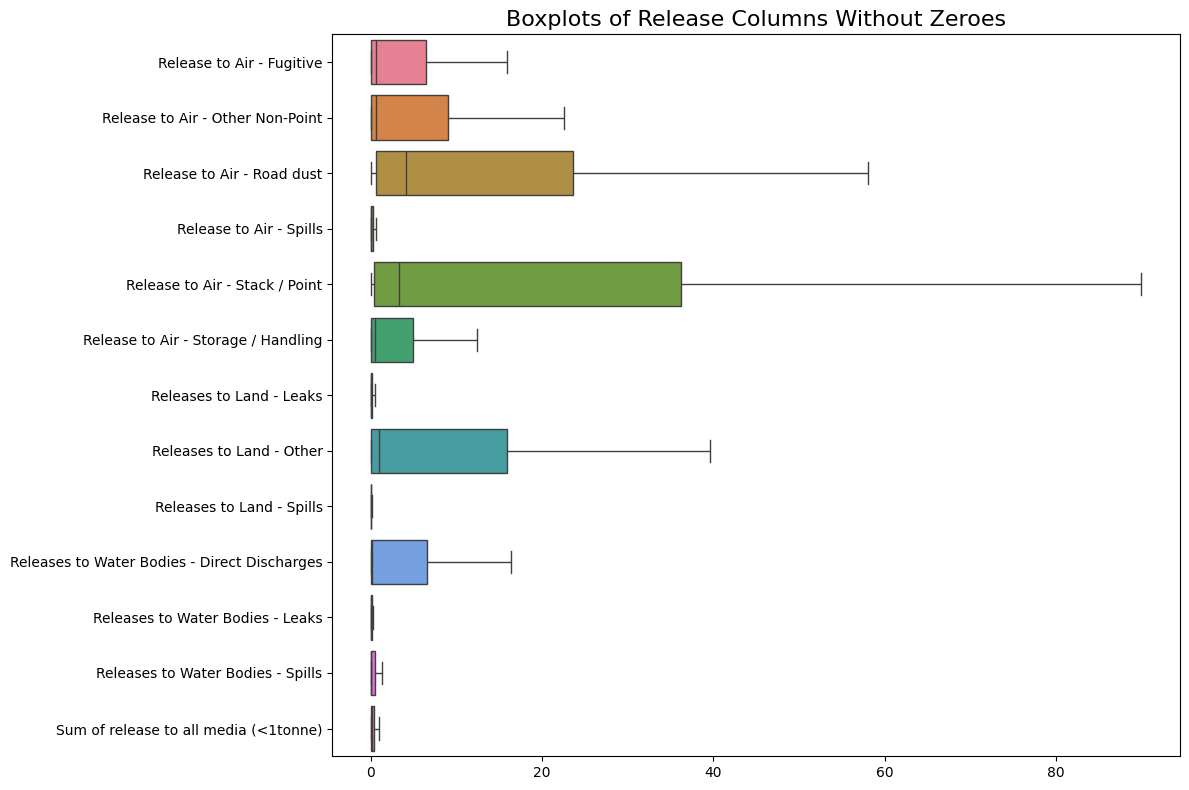

In [ ]:
# Boxplot without zeroes

data_filtered = df[df[release_columns] != 0]

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_filtered[release_columns], orient='h')
plt.title('Boxplots of Release Columns Without Zeroes', fontsize=16)
plt.tight_layout()
plt.show()

We can see from comparing the boxplots above that the IQR method omitting zeroes does a more effective job of detecting outliers for the release columns.

We can also see a similar distribution to the boxplot of release column values without zero values.

# 6. Pattern Discovery, Visualizations & Statistics - Alma Soria and Michaela Goud

# **Authors: Alma Soria and Michaela Goud**

We first save our pre-cleaned dataset into a csv file to avoid modifying the original.

In [ ]:
df_iqr_omit_zero.to_csv("df_releases_preclean.csv", index=False)

In [ ]:
# Create working copies for EDA, and to avoid modifying original
df_clean = df_iqr_omit_zero.copy()


In [ ]:
df_clean.head()

Reporting_Year  NPRI_ID  Number of employees                           Company_Name                                      Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code
0            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867  10049-04-4   chlorine dioxide  tonnes                        0.0                               0.0                         0.0                      0.0                           5.200                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      M
1            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-56-1           methanol  tonnes                        0.0                               0.0                         0.0                      0.0                          89.996                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      E
2            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-66-3         chloroform  tonnes                        0.0                               0.0                         0.0                      0.0                           0.000                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      M
3            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     75-07-0       acetaldehyde  tonnes                        0.0                               0.0                         0.0                      0.0                           7.670                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      E
4            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867   7647-01-0  hydrochloric acid  tonnes                        0.0                               0.0                         0.0                      0.0                           0.665                                  0.0                       0.0                       0.0                    

## Create New Columns

We will create aggregated features that sum release value data scross specific columns in our dataframe.

This will create a more manageable set of features to visualize.

In [ ]:
# Create aggregate features for analysis
df_clean['Total_Air_Releases'] = df_clean[[col for col in release_cols if 'Air' in col]].sum(axis=1)
df_clean['Total_Land_Releases'] = df_clean[[col for col in release_cols if 'Land' in col]].sum(axis=1)
df_clean['Total_Water_Releases'] = df_clean[[col for col in release_cols if 'Water' in col]].sum(axis=1)
df_clean['Total_All_Releases'] = df_clean[release_cols].sum(axis=1)



Saving df_clean with new columns

In [ ]:
df_clean.to_csv("df_clean_releases_total_new_columns.csv", index=False)

In [ ]:
df = df_clean.copy()

In [ ]:
df.head()

Reporting_Year  NPRI_ID  Number of employees                           Company_Name                                      Facility_Name   NAICS          NAICS_Title Province                 City   Latitude   Longitude  CAS_Number     Substance_Name   Units  Release to Air - Fugitive  Release to Air - Other Non-Point  Release to Air - Road dust  Release to Air - Spills  Release to Air - Stack / Point  Release to Air - Storage / Handling  Releases to Land - Leaks  Releases to Land - Other  Releases to Land - Spills  Releases to Water Bodies - Direct Discharges  Releases to Water Bodies - Leaks  Releases to Water Bodies - Spills  Sum of release to all media (<1tonne) Estimation_Method_Code  Total_Air_Releases  Total_Land_Releases  Total_Water_Releases  Total_All_Releases
0            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867  10049-04-4   chlorine dioxide  tonnes                        0.0                               0.0                         0.0                      0.0                           5.200                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      M               5.200                  0.0                   0.0               5.200
1            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-56-1           methanol  tonnes                        0.0                               0.0                         0.0                      0.0                          89.996                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      E              89.996                  0.0                   0.0              89.996
2            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     67-66-3         chloroform  tonnes                        0.0                               0.0                         0.0                      0.0                           0.000                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      M               0.000                  0.0                   0.0               0.000
3            2000        1                440.0  alberta pacific forest industries inc  alberta pacific forest industries inc (unnamed...  322112  chemical pulp mills       ab  county of athabasca  54.923116 -112.861867     75-07-0       acetaldehyde  tonnes                        0.0                               0.0                         0.0                      0.0                           7.670                                  0.0                       0.0                       0.0                        0.0                                           0.0                               0.0                                0.0                                  0.000                      E               7.670                  0.0                   0.0               7.670
4            2000        1                440.0  alberta pacific forest industries inc  alberta pa

## Visualizations

### Releases Trend Over Time

This line plot effectively shows the overall trend of pollutant releases over time.

The plot shows a dramatic increase in total releases between 2000 and 2003. This could suggest a significant change in reporting, industrial activity, or other factors during this period.

From 2003 to 2017, the releases plateau at a relatively high level.

There is then a sharp decline observed in 2017. This could indicate a crucial poiunt requiring further investigation.

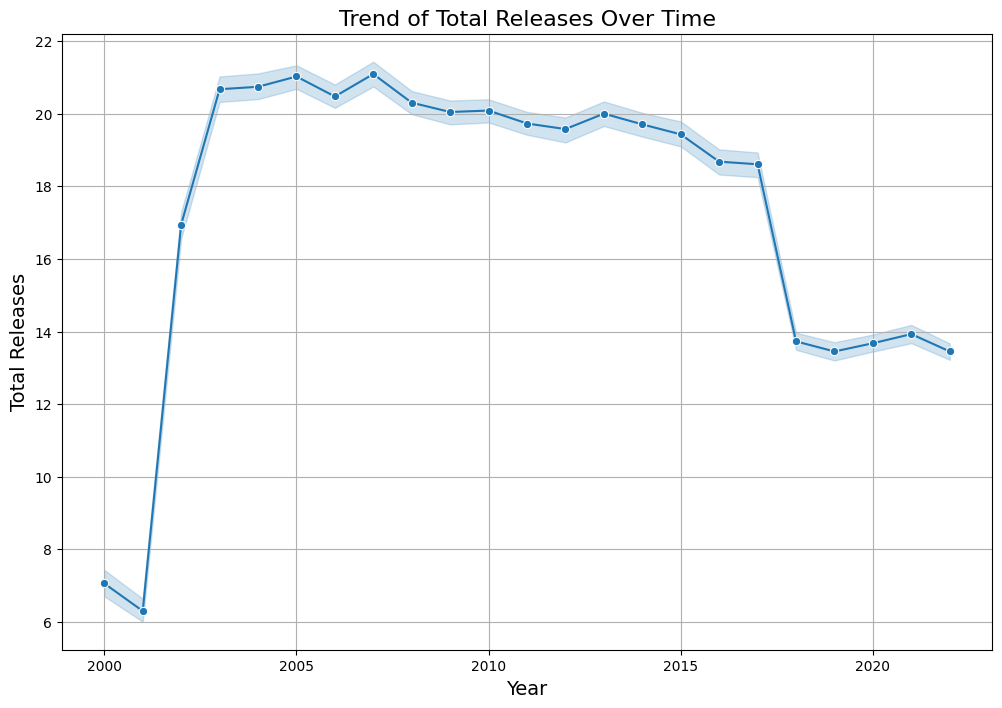

In [ ]:
# Releases trend over time

df['Total_Releases'] = df[release_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Releases', marker='o')
plt.title('Trend of Total Releases Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.grid(True)
plt.show()

### Trend of Total Releases by Pollutant Type Over Time



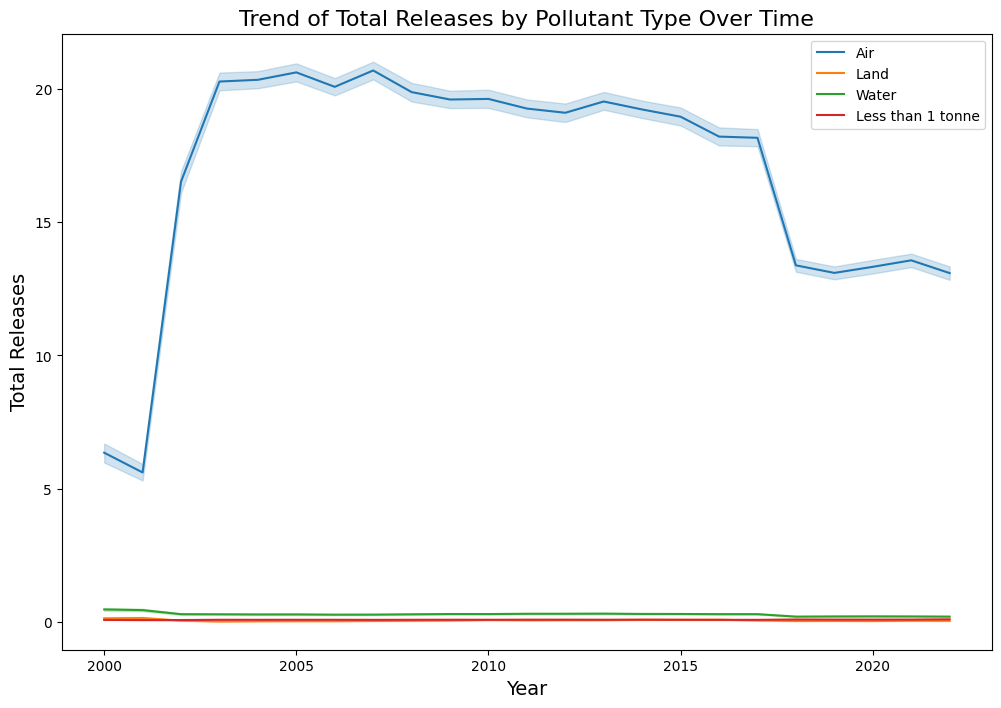

In [ ]:
# Releases trends by type of pollutant

air_columns = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Stack / Point',
    'Release to Air - Storage / Handling'
]

land_columns = [
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills'
]

water_columns = [
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills'
]

df['Total_Air_Releases'] = df[air_columns].sum(axis=1)
df['Total_Land_Releases'] = df[land_columns].sum(axis=1)
df['Total_Water_Releases'] = df[water_columns].sum(axis=1)

plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Reporting_Year', y='Total_Air_Releases', label='Air')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Land_Releases', label='Land')
sns.lineplot(data=df, x='Reporting_Year', y='Total_Water_Releases', label='Water')
sns.lineplot(data=df, x='Reporting_Year', y='Sum of release to all media (<1tonne)', label='Less than 1 tonne')
plt.title('Trend of Total Releases by Pollutant Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases', fontsize=14)
plt.legend()
plt.show()

**Observations:**

* This plot clearly shows that "Air" releases are the dominant contributat to total releases. The trends in the "Total Releases" line chart above are almost entirely driven by the "Air" releases.

* Releases to "Land", "Water", and "Less than 1 tonne" are consistently very low compared to "Air" releases, and show relatively low variation over time.

* It's essential to understand why air releases are so much higher than other sectors. This could be due to the nature of the industries reporting to the NPRI or the types of pollutants being tracked.

* The lack of significant changes in these releases releases could indicate that these releases are well-controlled or that the reporting requirements for these sectors are different.

### Industry Trends Over Time

**Justification:**

This visualization serves as the foundation for your time series analysis by showing how different industries' pollution patterns have evolved over time. By focusing on the top 10 industries by total releases, we identify the most significant contributors to pollution in Canada.

These visual patterns are crucial for identifying which industries have been consistently high polluters vs. those showing variability.




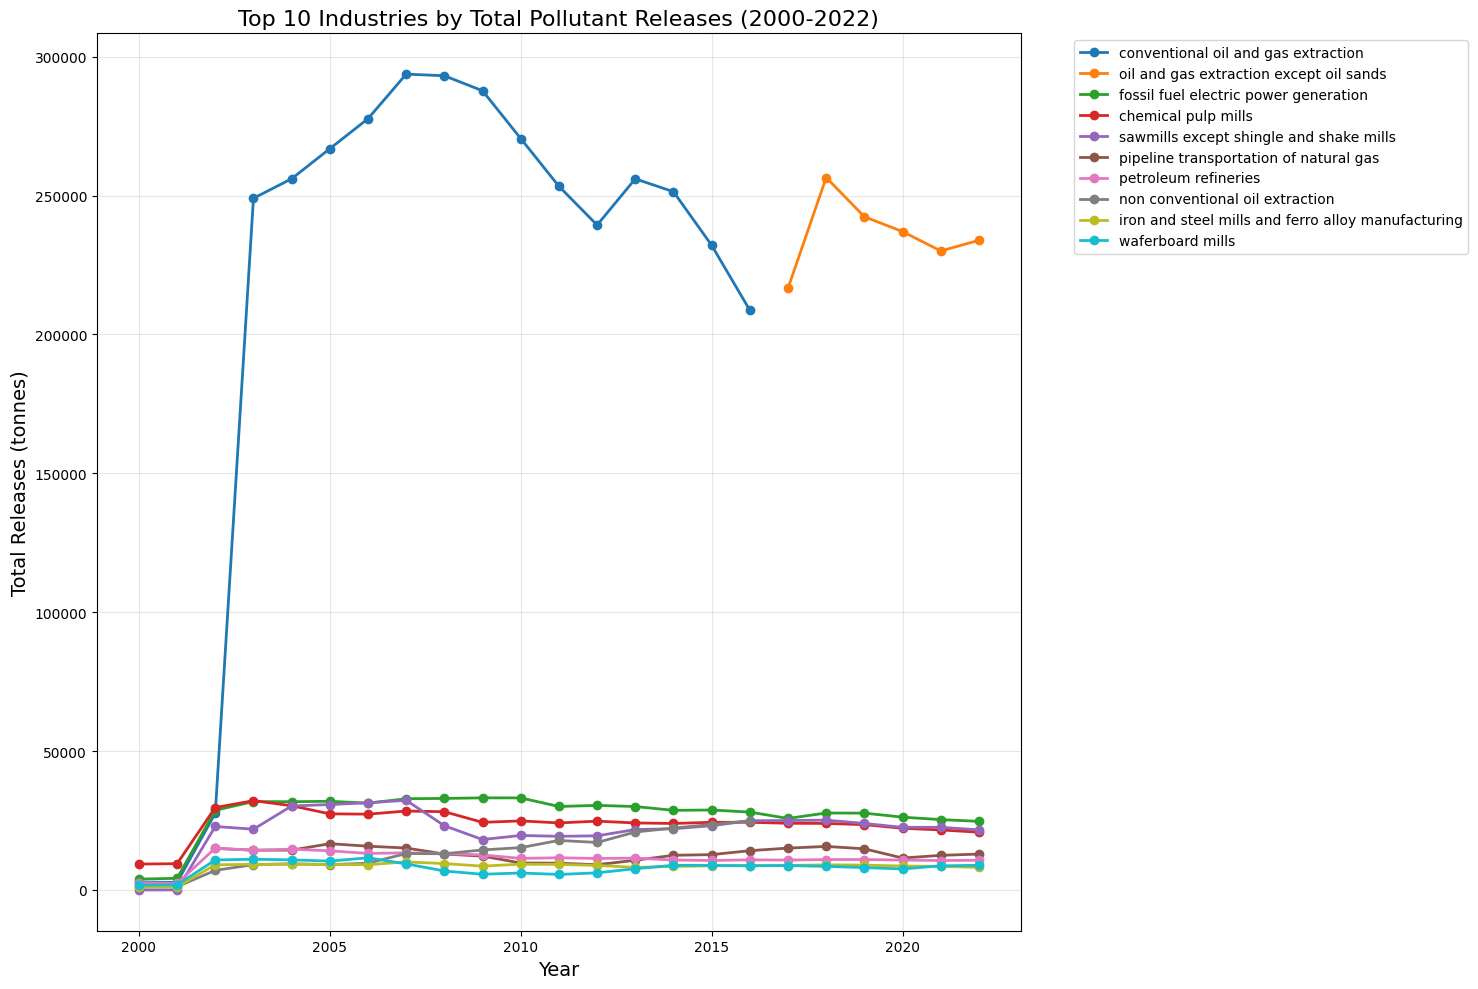

In [ ]:
# Create a new dataframe that aggregates total releases by industry and year
industry_yearly_trends = df_clean.groupby(['Reporting_Year', 'NAICS_Title'])['Total_All_Releases'].sum().reset_index()

# Pivot the data for easier plotting
industry_pivot = industry_yearly_trends.pivot(index='Reporting_Year', columns='NAICS_Title', values='Total_All_Releases')

# Plot the data
plt.figure(figsize=(15, 10))
# Select top 10 industries by total releases
top_industries = industry_yearly_trends.groupby('NAICS_Title')['Total_All_Releases'].sum().nlargest(10).index

for industry in top_industries:
    if industry in industry_pivot.columns:
        plt.plot(industry_pivot.index, industry_pivot[industry], marker='o', linewidth=2, label=industry)

plt.title('Top 10 Industries by Total Pollutant Releases (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases (tonnes)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**

* "Conventional oil and gas extraction" stands out with significantly higher total pollutant releases compared to all other industries. This industry drives the overall trend seen in the earlier "Total Releases" plots.

* It is imprtant to understand why the "conventional oil and gas extraction" industry has such high releases. This could be due to the nature of their operations, the scale of their activities, or the types of pollutants they release.

* The other nine industries show relatively lower and more varied trends. Similarly, we should investigate the factors driving trends in the other nine industries.



### Growth Rate Analysis
While the trends visualization shows the absolute values, this analysis quantifies the relative change (growth or decline) in releases for each industry. This is directly relevant to our project goal of predicting which industries will show growth or decline in the future. This analysis:

* Calculates a standardized measure (percentage growth) that allows comparison between industries of different sizes
* Reveals which industries are already on significant growth or decline trajectories
* Identifies industries that might be experiencing structural changes or responding to regulation
* Provides a key input variable for our model, as past growth rates are often predictive of future behavior
* Helps prioritize which industries should be the focus of our prediction efforts

In [ ]:
# Calculate year-over-year growth rates
def calculate_growth_rates(df_clean):
    # Group by industry and year
    industry_yearly = df_clean.groupby(['Reporting_Year', 'NAICS_Title'])['Total_All_Releases'].sum().reset_index()

    # Calculate growth rates over 5-year periods
    growth_rates = []

    for industry in industry_yearly['NAICS_Title'].unique():
        industry_data = industry_yearly[industry_yearly['NAICS_Title'] == industry].sort_values('Reporting_Year')

        # Skip industries with insufficient data
        if len(industry_data) < 5:
            continue

        # Calculate 5-year growth rate for the most recent data
        recent_years = industry_data.tail(6)  # Get the most recent 6 years (to calculate 5 year change)
        if len(recent_years) >= 6:
            start_value = recent_years.iloc[0]['Total_All_Releases']
            end_value = recent_years.iloc[-1]['Total_All_Releases']

            # Avoid division by zero
            if start_value > 0:
                growth_rate = ((end_value - start_value) / start_value) * 100

                growth_rates.append({
                    'Industry': industry,
                    'Start_Year': recent_years.iloc[0]['Reporting_Year'],
                    'End_Year': recent_years.iloc[-1]['Reporting_Year'],
                    'Start_Value': start_value,
                    'End_Value': end_value,
                    'Growth_Rate': growth_rate
                })

    return pd.DataFrame(growth_rates)

# Calculate and display growth rates
growth_df = calculate_growth_rates(df_clean)

growth_df.head()

Industry  Start_Year  End_Year  Start_Value   End_Value  Growth_Rate
0                     abrasive product manufacturing        2017      2022    87.021500  106.033434    21.847399
1                             adhesive manufacturing        2017      2022   151.682101   96.741598   -36.220821
2          aerospace product and parts manufacturing        2017      2022   827.484766  815.494416    -1.449012
3  agricultural chemical and other farm supplies ...        2006      2011    32.819063  944.927823  2779.204191
4               agricultural implement manufacturing        2017      2022   132.336938  157.918100    19.330327

### Another Type of Outlier Detection and Analysis

Outliers can significantly impact time series forecasting and lead to inaccurate predictions if not properly handled.

This step is crucial because:

* Unusual spikes in pollutant releases might represent data errors, one-time events, or important policy changes
* Identifying outliers helps distinguish between normal operational variability and exceptional circumstances
Understanding the cause of outliers (e.g., facility expansions, accidents, regulation changes) improves forecast accuracy
* Industry-specific outlier patterns may reveal different operational or reporting behaviors across sectors
*Proper handling of outliers ensures our prediction model isn't skewed by non-representative historical data points

We will create a series of scatter plots depicting the total releases (in tonnes) of various industrial sectors over time, with a focus on identifying outliers.

<Figure size 1500x1000 with 0 Axes>

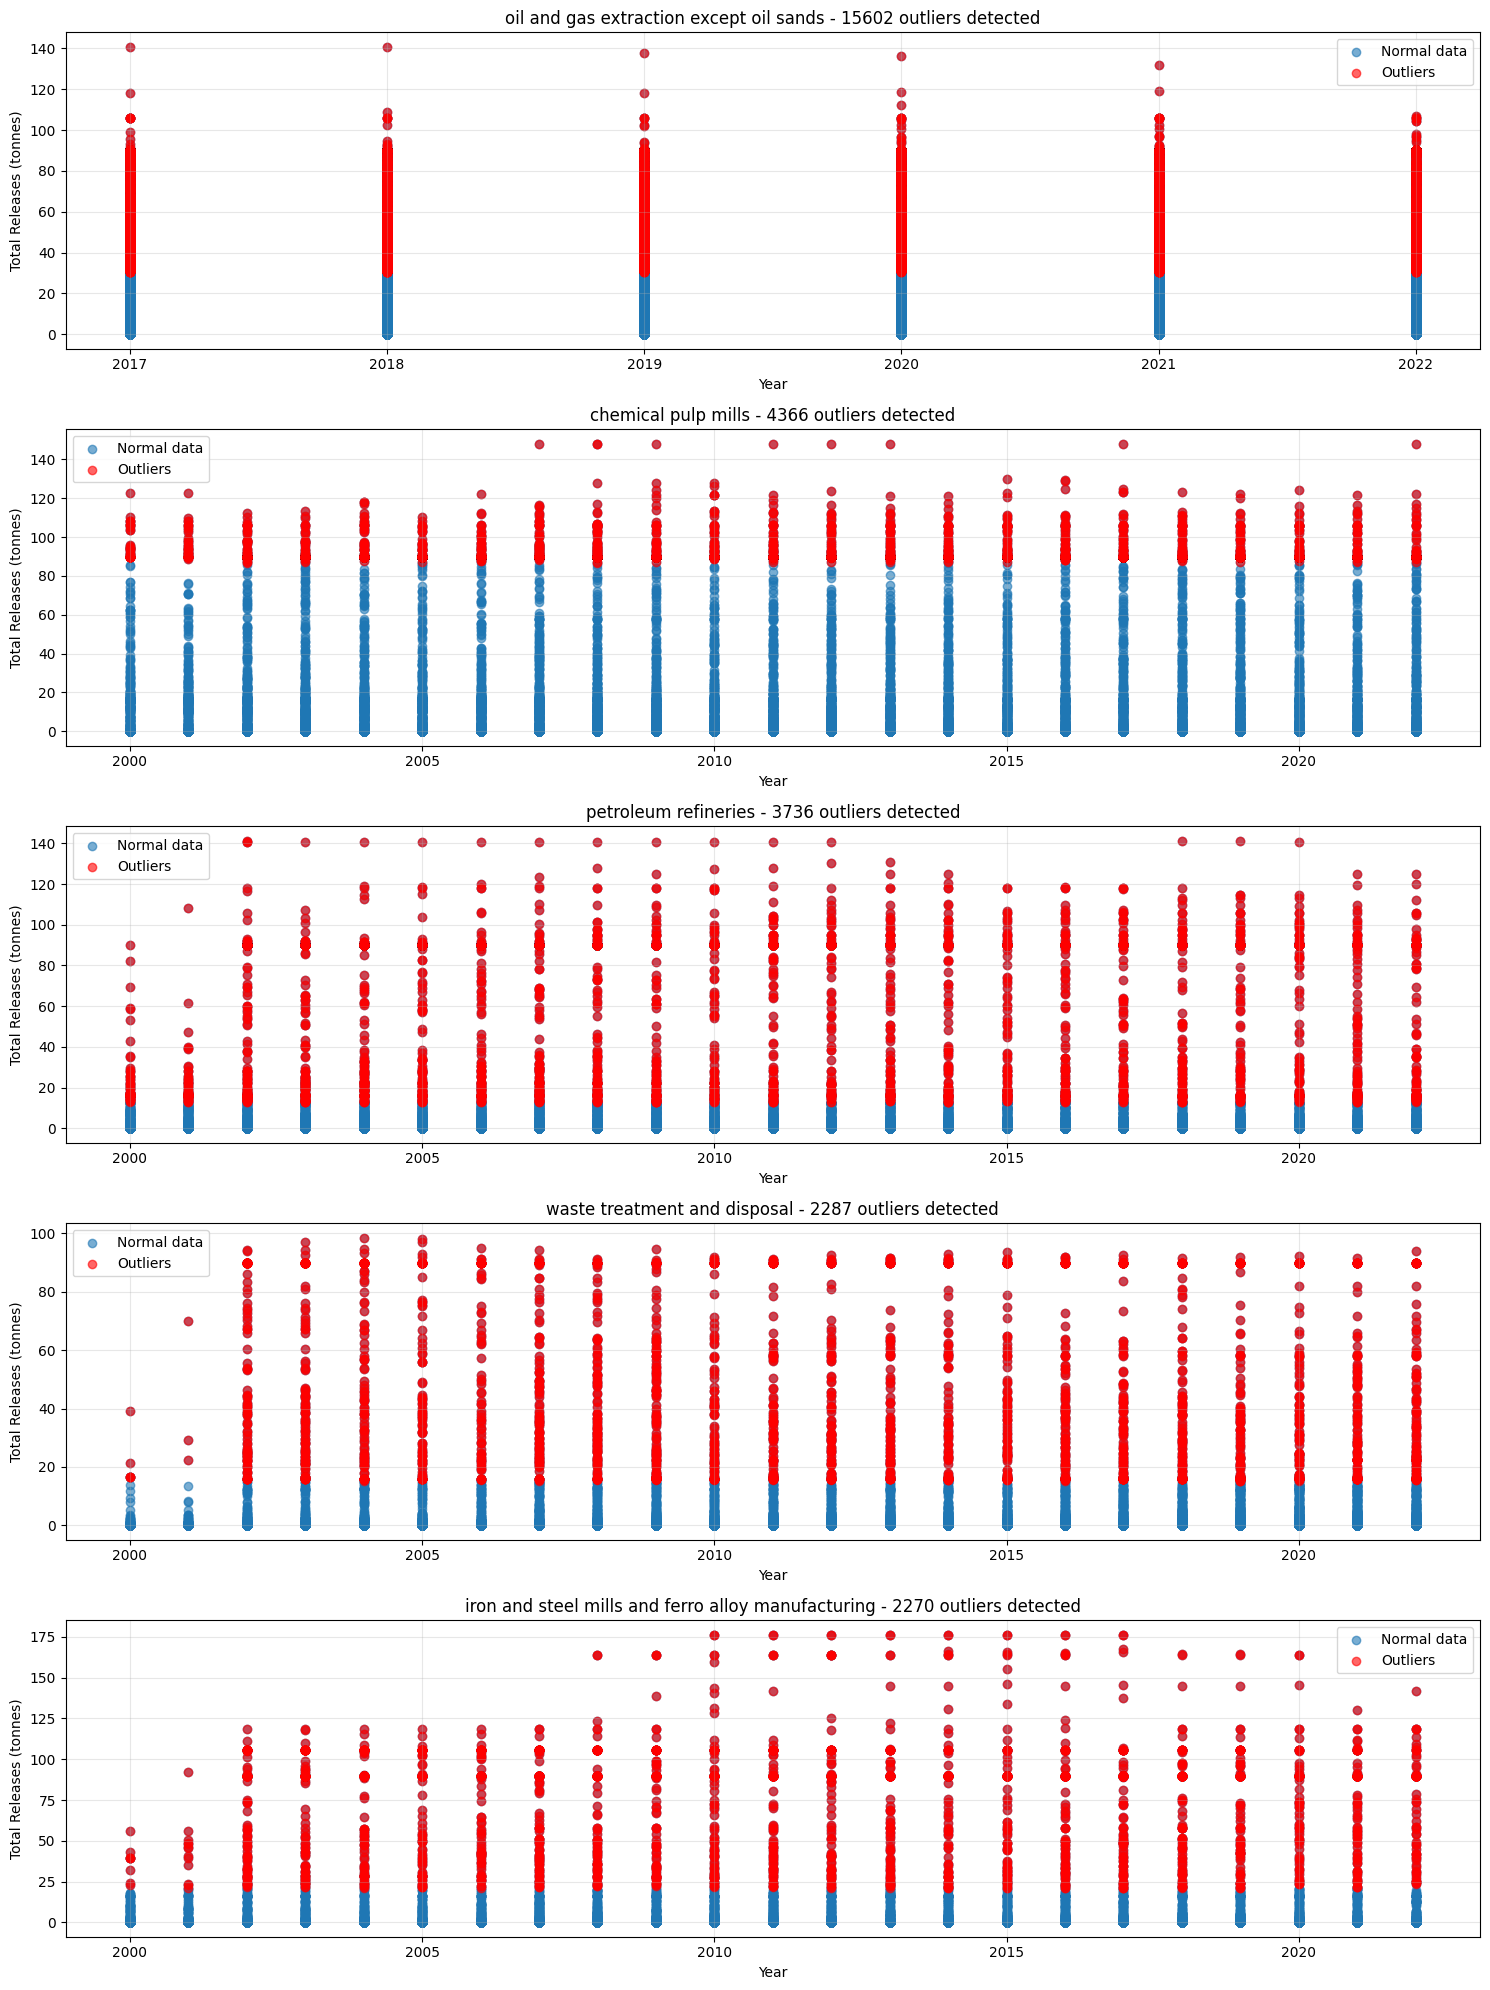

In [ ]:
# Create a function to detect outliers using IQR method
def detect_outliers(industry_data):
    Q1 = industry_data['Total_All_Releases'].quantile(0.25)
    Q3 = industry_data['Total_All_Releases'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = industry_data[(industry_data['Total_All_Releases'] < lower_bound) |
                             (industry_data['Total_All_Releases'] > upper_bound)]

    return outliers

# Find outliers for each industry
industry_outliers = {}
for industry in df_clean['NAICS_Title'].unique():
    industry_data = df_clean[df_clean['NAICS_Title'] == industry]
    outliers = detect_outliers(industry_data)
    if len(outliers) > 0:
        industry_outliers[industry] = outliers

# Plot outliers for top 5 industries with most outliers
top_outlier_industries = {k: len(v) for k, v in industry_outliers.items()}
top_outlier_industries = dict(sorted(top_outlier_industries.items(), key=lambda item: item[1], reverse=True)[:5])

plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(len(top_outlier_industries), 1, figsize=(15, 4*len(top_outlier_industries)))

for i, (industry, count) in enumerate(top_outlier_industries.items()):
    industry_data = df_clean[df_clean['NAICS_Title'] == industry]
    outliers = industry_outliers[industry]

    axes[i].scatter(industry_data['Reporting_Year'], industry_data['Total_All_Releases'],
                   alpha=0.6, label='Normal data')
    axes[i].scatter(outliers['Reporting_Year'], outliers['Total_All_Releases'],
                   color='red', alpha=0.6, label='Outliers')
    axes[i].set_title(f'{industry} - {count} outliers detected')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Releases (tonnes)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis - Release Columns

Understanding the relationships between different types of pollutant releases helps identify underlying patterns that might not be visible when looking at total releases alone.

This analysis:

* Reveals if certain types of pollutants tend to be released together, suggesting common industrial processes
* Identifies potential substitution effects (where reduction in one type of release leads to increase in another)
* Supports feature selection for predictive modeling by showing which release types are independent vs. correlated
* Helps identify potential regulatory impacts that affect some release types but not others
* Provides insights into how comprehensive pollution reduction efforts need to be across release types

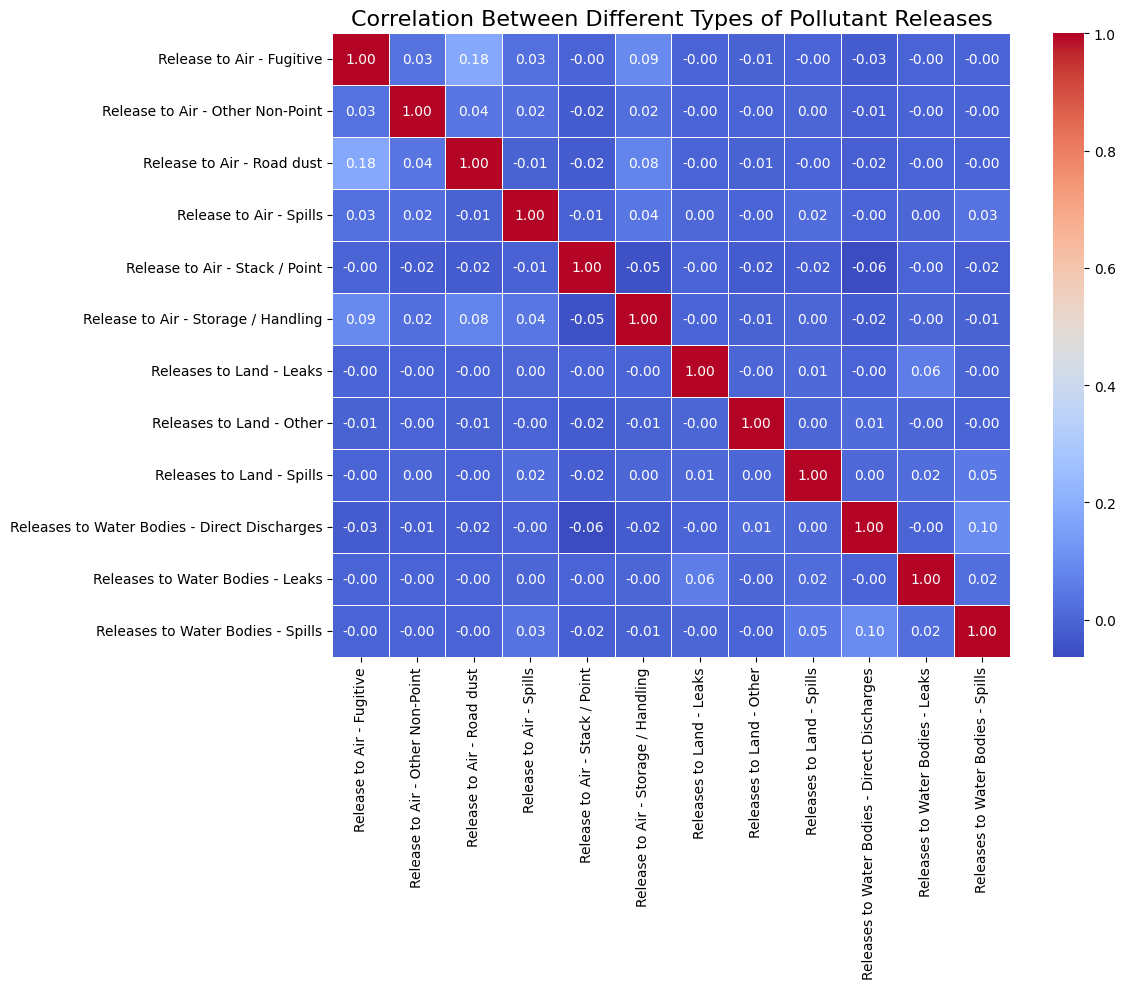

In [ ]:
# Select release columns for correlation analysis
release_columns = [col for col in df_clean.columns if 'Release' in col and 'Total' not in col]

# Calculate correlation matrix
release_corr = df_clean[release_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(release_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Different Types of Pollutant Releases', fontsize=16)
plt.tight_layout()
plt.show()

**Observations:**

Overall, the correlation heatmap for release columns reveals that there are generally weak correlations between different types of pollutant releases. This suggests that the factors influencing these releases are complex and varied.

**Air Releases**
* Moderate positive correlation (0.18) between Fugutive and Road Dust suggests these two sources may be influenced by similar factors.

**Land Releases**
* Moderate positive correlation (0.16) between leaks and spills suggests that incidents leading to leaks might also be associated with spills.

**Cross-Type Correlations**
* Most correlations between air, land, and water releases are weak. This indicates that pollutants don't necessarily transfer easily between these environmental compartments.


### Correlation Analysis - All Numeric Columns

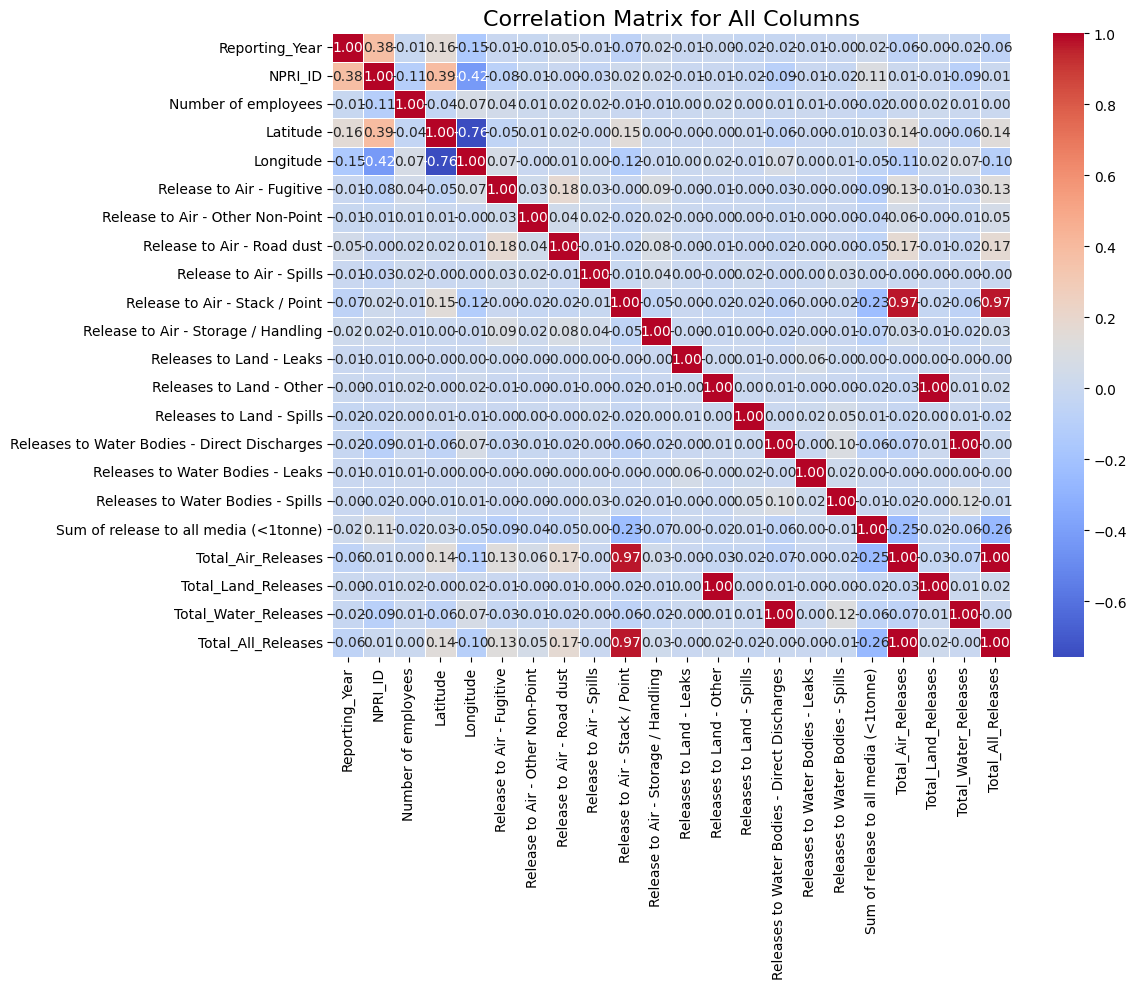

In [ ]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

numeric_corr = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for All Columns', fontsize=16)
plt.tight_layout()
plt.show()

**Observations:**

The heatmap provides a quick overview of the relationships between different variables in our dataset. However, it also emphasizes the prevalence of weak correlations, suggesting that many factors influencing pollutant releases are complex and may require further investigation to understand fully.

### Geographical Distribution of Pollutants


Location is a critical factor in understanding pollution patterns, as different provinces have different industrial compositions, regulations, and economic conditions.

This analysis:

* Identifies regional pollution hotspots that might require special attention
* Shows if certain provinces are making more progress than others in reducing emissions over time
* Reveals potential regional economic shifts as industries grow or decline in different areas
* Helps determine if predictions should be made at national level or disaggregated by province
* Supports policy recommendations by highlighting regional success stories or areas needing intervention

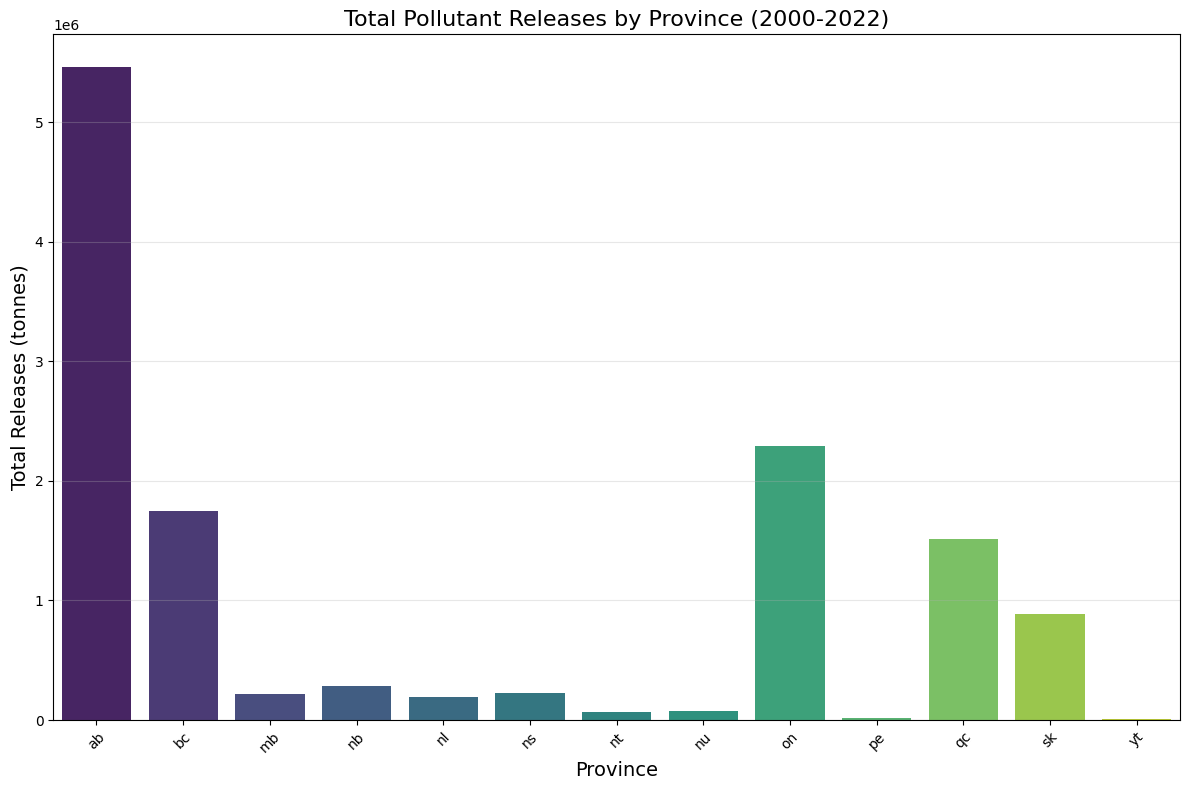

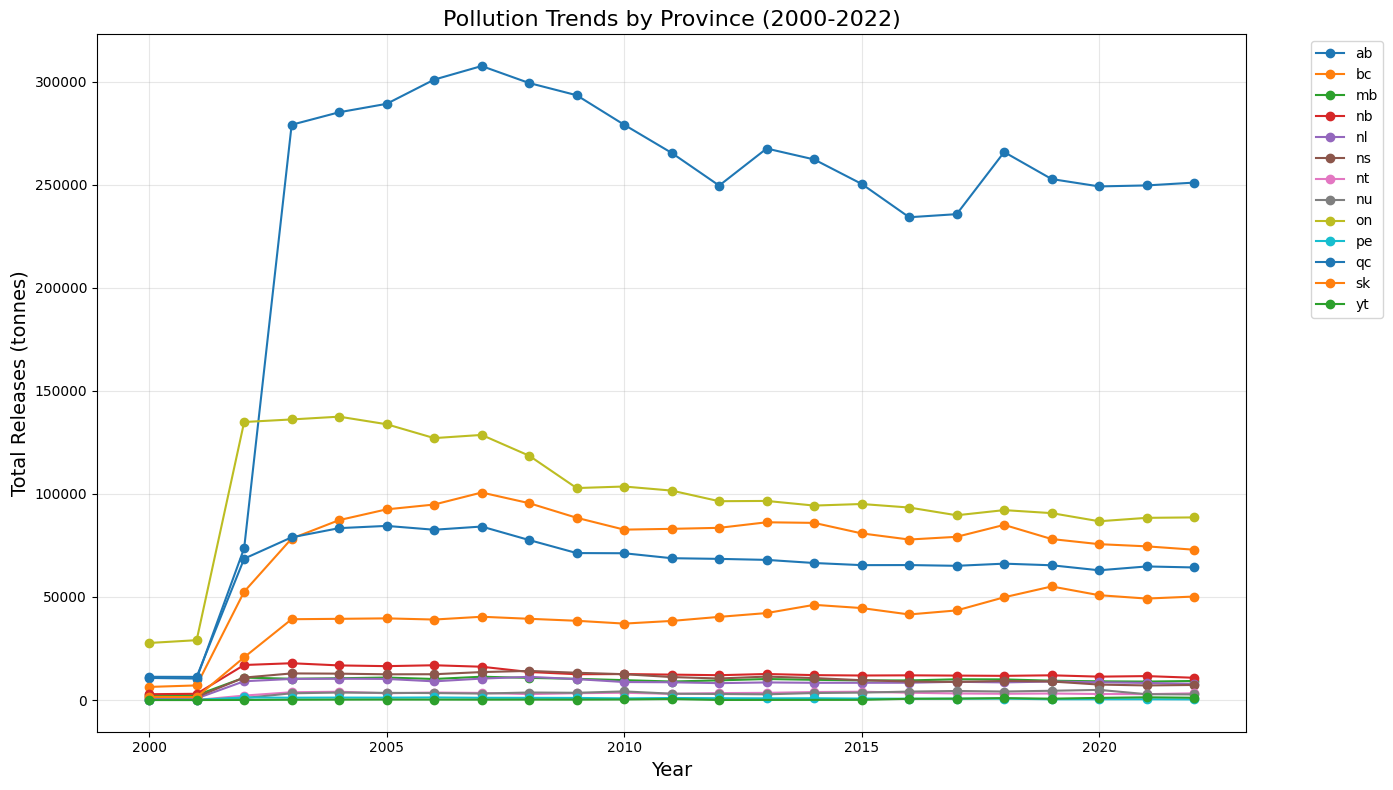

In [ ]:
# Create a map of Canada showing pollution by province
province_pollution = df_clean.groupby('Province')['Total_All_Releases'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Province', y='Total_All_Releases', data=province_pollution, hue='Province', palette='viridis')
plt.title('Total Pollutant Releases by Province (2000-2022)', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Total Releases (tonnes)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Time series by province
province_yearly = df_clean.groupby(['Reporting_Year', 'Province'])['Total_All_Releases'].sum().reset_index()

plt.figure(figsize=(14, 8))
for province in province_yearly['Province'].unique():
    province_data = province_yearly[province_yearly['Province'] == province]
    plt.plot(province_data['Reporting_Year'], province_data['Total_All_Releases'], marker='o', label=province)

plt.title('Pollution Trends by Province (2000-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Releases (tonnes)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Observations:**

* Alberta leads in pollutant releases, likely due to the large oil, gas, and industrial sectors in this province.

* Ontario follows second, with emissions likely stemming from manufacturing, transportation, and industrial activities.

* British Columbia follows third, with a mix of industrial emissions and natural resource extraction.

* Quebec and Saskatchewan both have moderate emissions.

* All other provinces and territories have much lower releases.

### Time Series Decomposition

This advanced analytical technique separates time series data into trend, seasonal, and residual components, which is essential for accurate forecasting.

This step:

* Isolates the underlying trend from seasonal variations and random fluctuations
* Determines if industries have cyclical patterns in their releases (e.g., seasonal production)
* Identifies the strength of the trend component relative to noise, which informs prediction confidence
* Helps select appropriate time series forecasting methods based on the characteristics of each component
* Improves prediction accuracy by understanding the different factors driving changes in release amounts

Skipping oil and gas extraction except oil sands due to insufficient data.


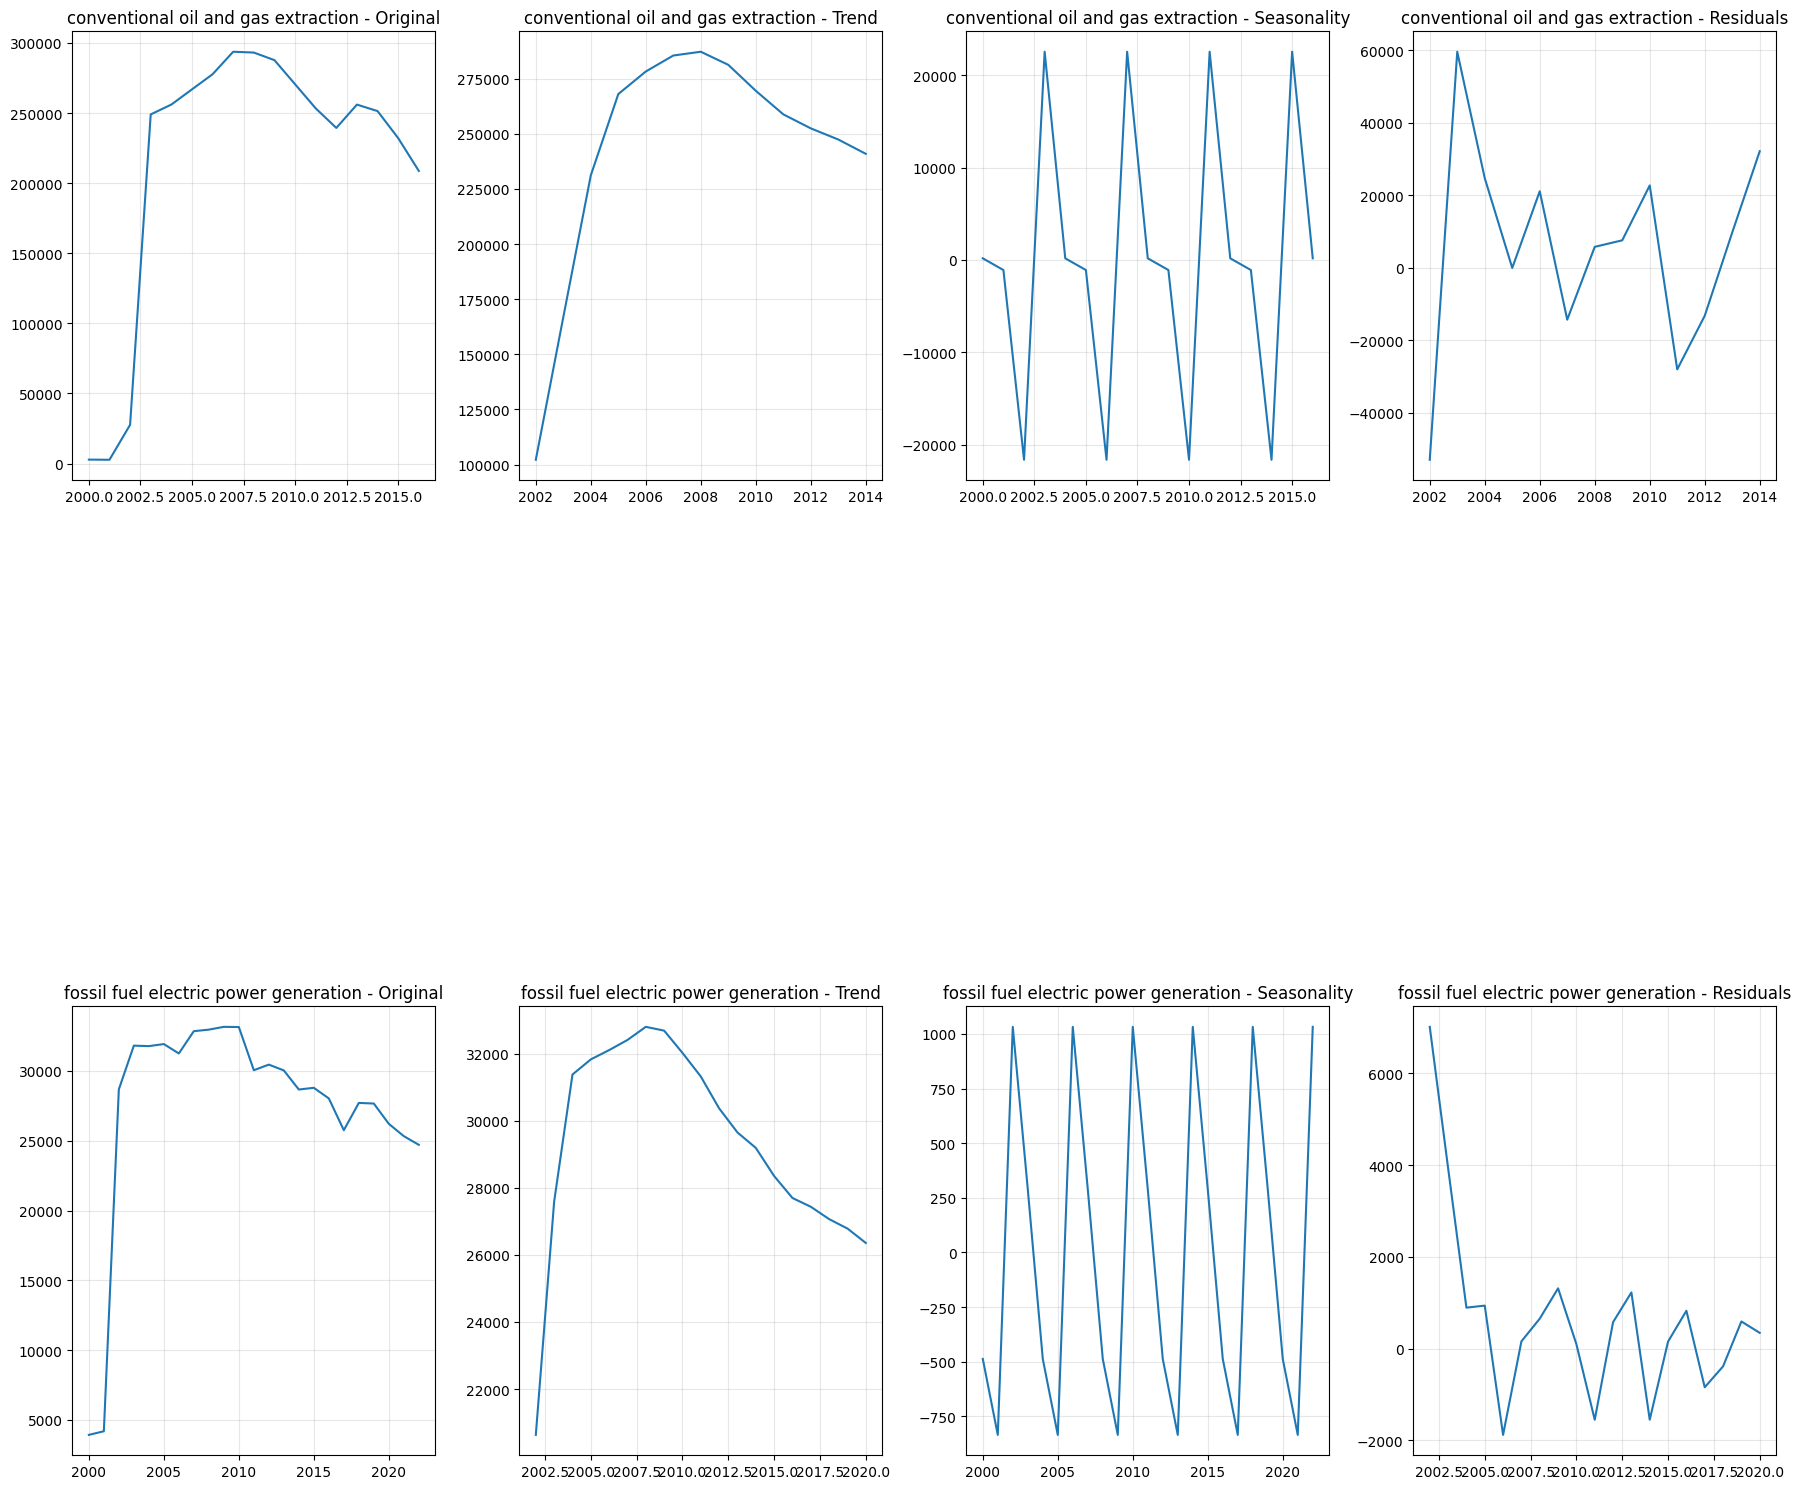

In [ ]:
# For top 3 industries, decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

top_3_industries = industry_yearly_trends.groupby('NAICS_Title')['Total_All_Releases'].sum().nlargest(3).index

plt.figure(figsize=(18, 15))
for i, industry in enumerate(top_3_industries):
    industry_data = industry_yearly_trends[industry_yearly_trends['NAICS_Title'] == industry]
    industry_data = industry_data.sort_values('Reporting_Year')

    # Set index for time series analysis
    ts_data = industry_data.set_index('Reporting_Year')['Total_All_Releases']

    # Only decompose if we have enough data
    if len(ts_data) > 4:
        # Decompose the time series
        try:
            result = seasonal_decompose(ts_data, model='additive', period=4)

            # Plot each component
            plt.subplot(3, 4, i*4+1)
            plt.plot(ts_data.index, ts_data.values)
            plt.title(f'{industry} - Original')
            plt.grid(True, alpha=0.3)

            plt.subplot(3, 4, i*4+2)
            plt.plot(result.trend.index, result.trend.values)
            plt.title(f'{industry} - Trend')
            plt.grid(True, alpha=0.3)

            plt.subplot(3, 4, i*4+3)
            plt.plot(result.seasonal.index, result.seasonal.values)
            plt.title(f'{industry} - Seasonality')
            plt.grid(True, alpha=0.3)

            plt.subplot(3, 4, i*4+4)
            plt.plot(result.resid.index, result.resid.values)
            plt.title(f'{industry} - Residuals')
            plt.grid(True, alpha=0.3)
        except:
            print(f"Skipping {industry} due to insufficient data.")

plt.tight_layout()
plt.show()

**Observations:**

**Conventional Oil and Gas Extraction**

* This data shows a strong increase from 2000 to about 2008, followed by a decline after 2010. The seasonal component suggests periodic fluctuations, likely driven by market conditions or policy change. Large variations indicate some unpredictability beyond trend and seasonality.

**Fossil Fuel Electric Power Generation**

* This trend increased until around 2010 but has been declining since, suggesting a long-term reduction in fossil fuel-based electricity generation. A clear repeating pattern could be linked to seasonal energy demand (higher electricity use in winter or summer). There is significant variability throughout, indicating unpredictability.

### Prediction Model Preparation

This final step bridges our exploratory analysis with the predictive modeling phase of our project.

By preparing the data for forecasting, we:

* Transform the raw data into the format required for time series prediction algorithms
* Create a visual preview of the industries with highest growth and decline, confirming our earlier analyses
* Set up a framework that can be expanded to include additional features (e.g., economic indicators, policy changes)
* Establish a baseline for evaluating multiple prediction models
* Ensure your data is ready for the next phase of our project: building predictive models to forecast which industries will have the highest growth or decline in releases over the next five years

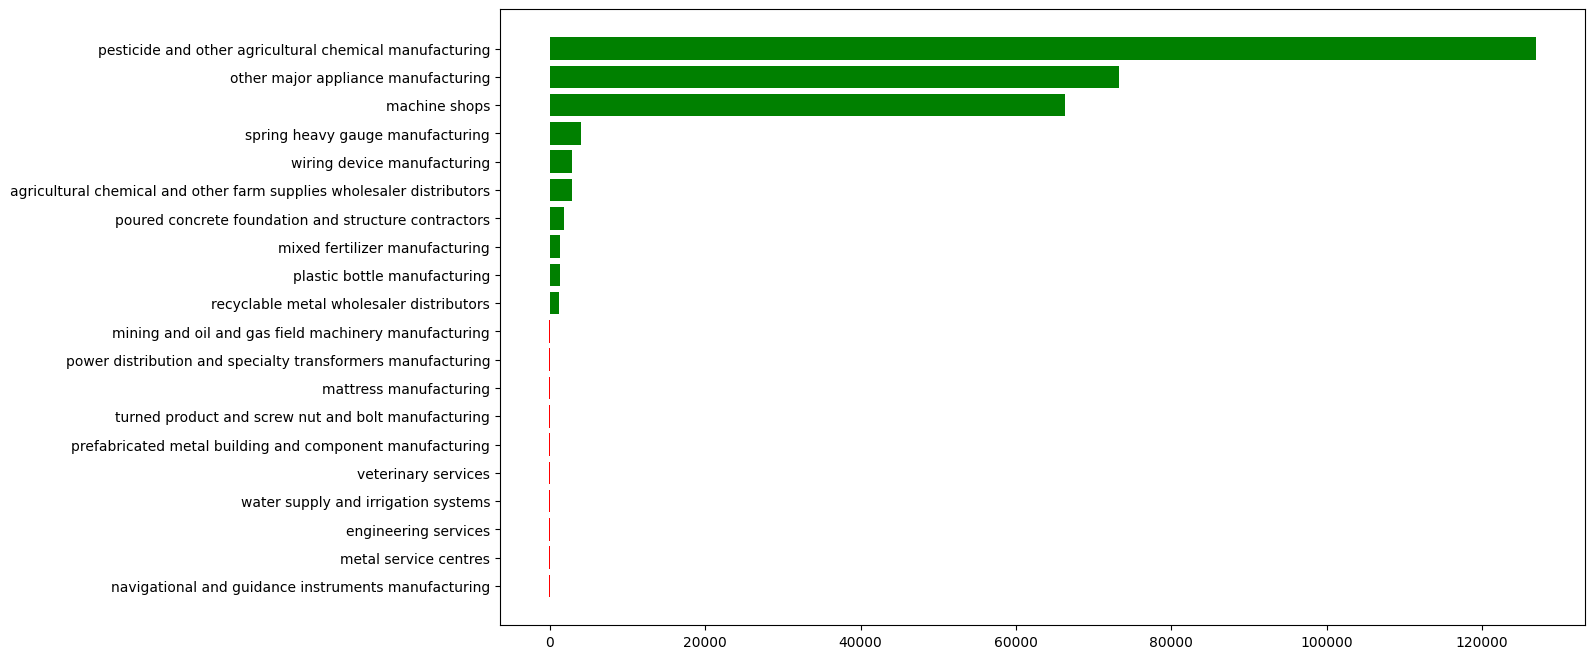

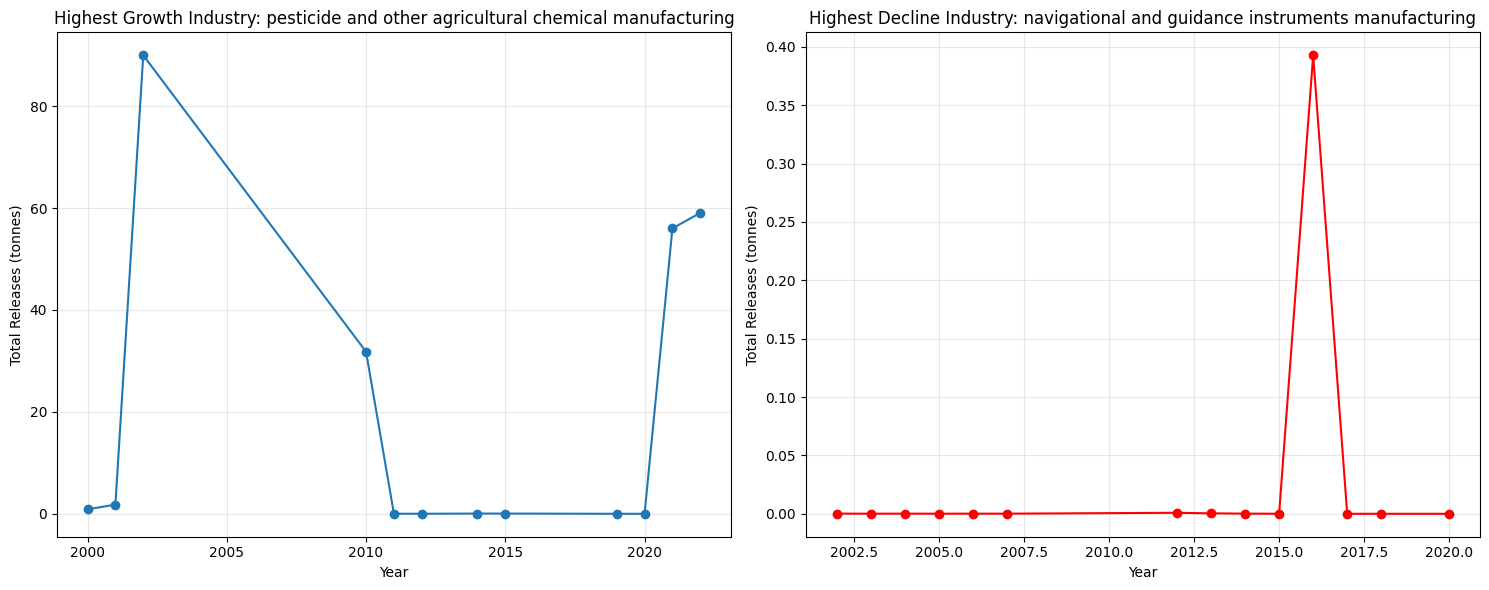

In [ ]:
# After calculating growth_df in the Growth Rate Analysis section:

# Sort by growth rate
sorted_growth = growth_df.sort_values('Growth_Rate')
top_decline = sorted_growth.head(10)  # Top 10 decline
top_growth = sorted_growth.tail(10)   # Top 10 growth

# Create plot
plt.figure(figsize=(14, 8))
plot_df = pd.concat([top_decline, top_growth])
colors = ['red' if x < 0 else 'green' for x in plot_df['Growth_Rate']]
plt.barh(plot_df['Industry'], plot_df['Growth_Rate'], color=colors)


# Prepare data for forecasting
def prepare_forecast_data(industry_name):
    industry_data = df_clean[df_clean['NAICS_Title'] == industry_name]
    yearly_totals = industry_data.groupby('Reporting_Year')['Total_All_Releases'].sum().reset_index()
    yearly_totals = yearly_totals.sort_values('Reporting_Year')

    # Convert to time series
    ts_data = yearly_totals.set_index('Reporting_Year')

    return ts_data

# Preview forecast preparation for top growth and decline industries
top_growth_industry = top_growth.iloc[-1]['Industry']
top_decline_industry = top_decline.iloc[0]['Industry']

growth_ts = prepare_forecast_data(top_growth_industry)
decline_ts = prepare_forecast_data(top_decline_industry)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(growth_ts.index, growth_ts['Total_All_Releases'], marker='o')
plt.title(f'Highest Growth Industry: {top_growth_industry}')
plt.xlabel('Year')
plt.ylabel('Total Releases (tonnes)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(decline_ts.index, decline_ts['Total_All_Releases'], marker='o', color='red')
plt.title(f'Highest Decline Industry: {top_decline_industry}')
plt.xlabel('Year')
plt.ylabel('Total Releases (tonnes)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observations:**

* There is a dramatic difference in the total releases between the top industries and the bottom industries. "Pesticide and other agricultural chemical manufacturing" has significantly higher releases than any other industry.

* The bottom industries have very low releases, practically negligible compared to the top performers.

* It is important to note the significant difference in the y-axis scales for the bottom graphs, where pesticides are measured in whole tonnes, while the navigational industry's releases are measured in fractions of a tonne. This highlights the vastly different magnitudes of releases between the two industries.

* The pesticide's industry exhibits much higher volatility in releases compared to the navigational industry, which remains relatively stable except for one spike.

* It is important to note that the data alone doesn't provide causal explanations and further investigation would be needed to understand the underlying factors driving these trends.

